# Feature Design and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/Gold/main.csv')

# Feature Design

## Expected Player Performance

Our goal is to calculate the expected performance score (stint_score) for a player based on a regression model that finds the relationship between stint_score and the player's percent_through_career.

We begin with a visual analysis of these variables

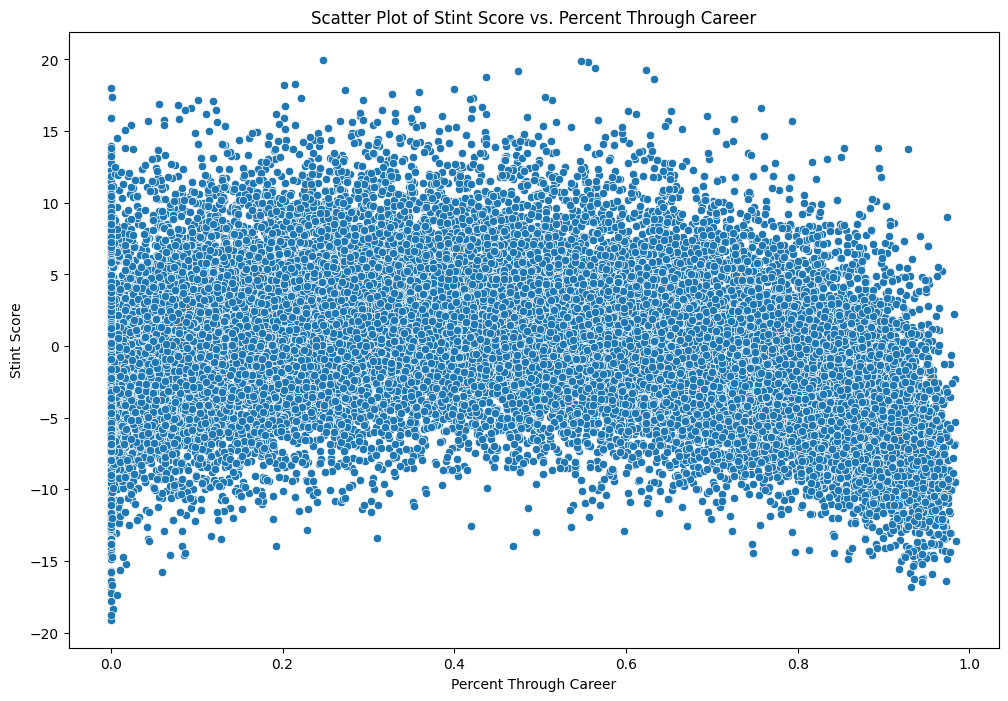

In [2]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='percent_through_career', y='stint_score')

# Add titles and labels
plt.title('Scatter Plot of Stint Score vs. Percent Through Career')
plt.xlabel('Percent Through Career')
plt.ylabel('Stint Score')

# Show the plot
plt.show()

There is a wide spread of potential stint scores depending how far the player is through their career.  Stint scores generally seem to improve until around 50% through a player's career, and they fall off after that.

Let's look at a few individual careers of well-known players, starting with Wayne Gretzky:

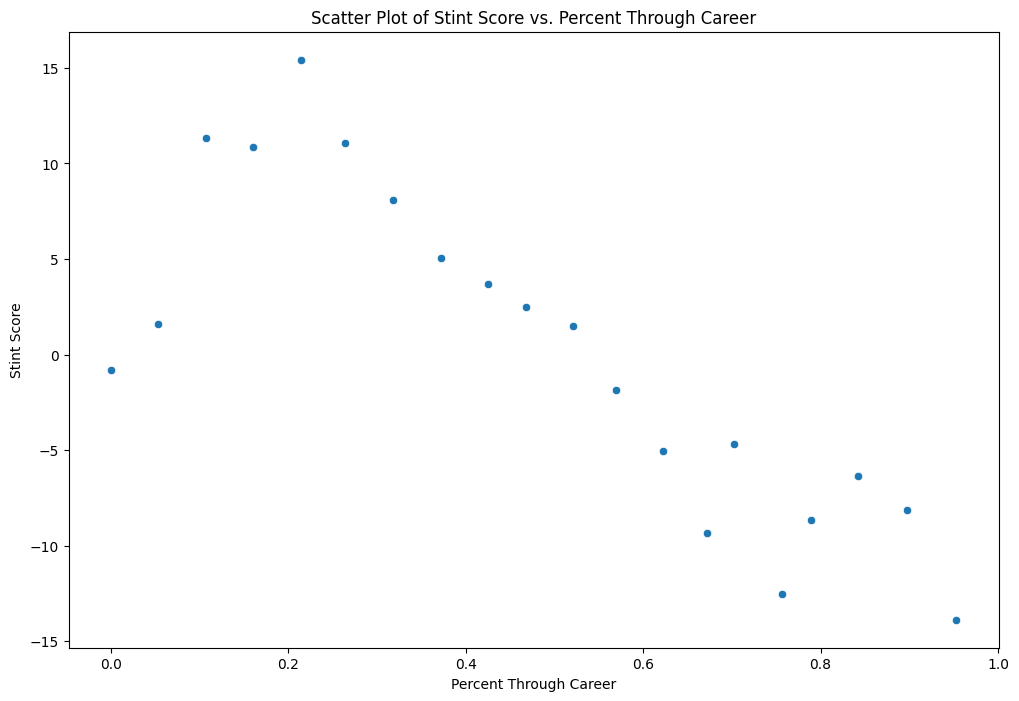

In [3]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['playerID'] == 'gretzwa01'], x='percent_through_career', y='stint_score')

# Add titles and labels
plt.title('Scatter Plot of Stint Score vs. Percent Through Career')
plt.xlabel('Percent Through Career')
plt.ylabel('Stint Score')

# Show the plot
plt.show()

Brett Hull:

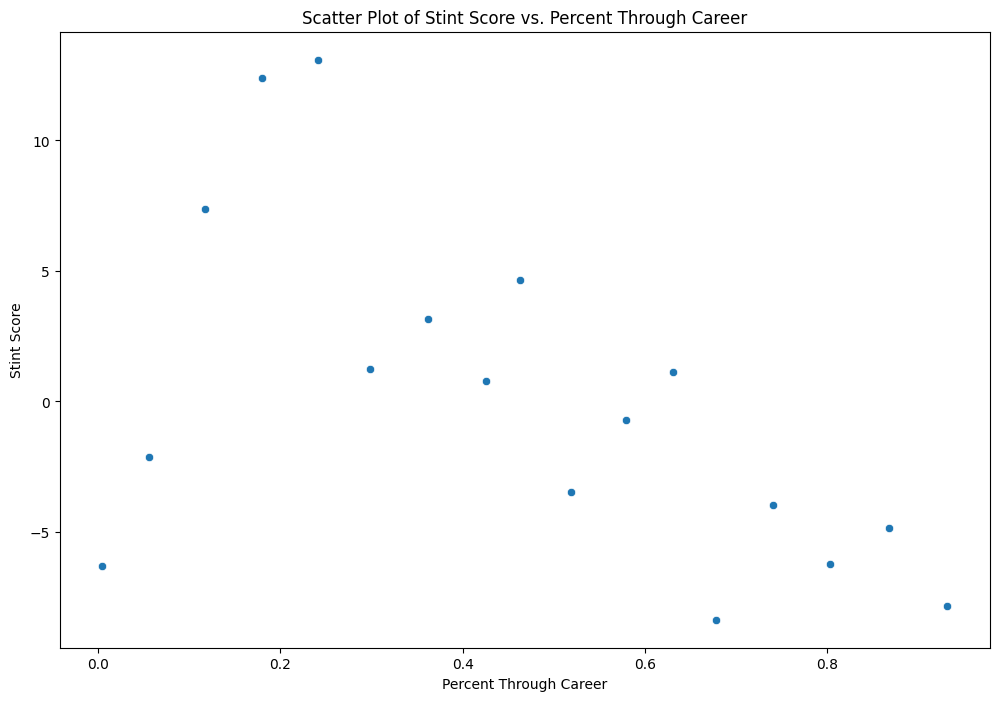

In [4]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['playerID'] == 'hullbr01'], x='percent_through_career', y='stint_score')

# Add titles and labels
plt.title('Scatter Plot of Stint Score vs. Percent Through Career')
plt.xlabel('Percent Through Career')
plt.ylabel('Stint Score')

# Show the plot
plt.show()

And now a player with notably fewer offensive achievements than the previous two, Marty McSorely, whose primary responsibility was often to protect Wayne Gretzky and not to make spectacular hockey plays:

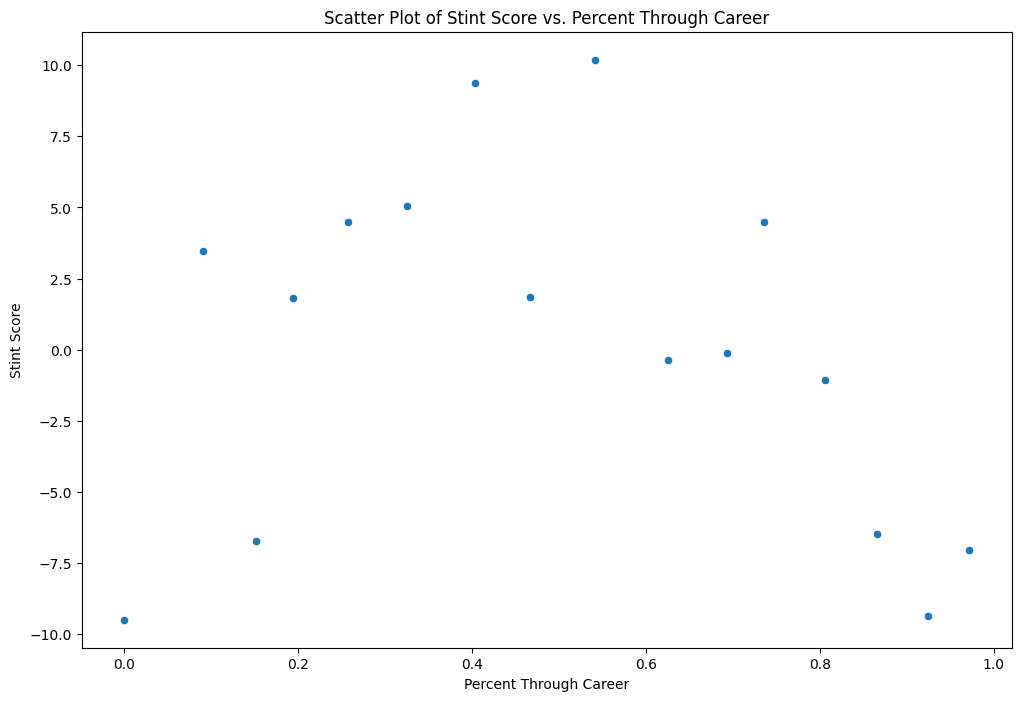

In [5]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['playerID'] == 'mcsorma01'], x='percent_through_career', y='stint_score')

# Add titles and labels
plt.title('Scatter Plot of Stint Score vs. Percent Through Career')
plt.xlabel('Percent Through Career')
plt.ylabel('Stint Score')

# Show the plot
plt.show()

Comparing all three charts, you can see that no matter who the player is, they will have a range of individual stint scores that reflects how successful that particular stint was in the players career.

### Polynomial Regression 
Polynomial regression can be used to model the relationship between these two variables and create a best-fit-curve.

In [6]:
import numpy as np
import statsmodels.api as sm

# Define the independent variable (X) and the dependent variable (y)
X = df['percent_through_career']
y = df['stint_score']

# Generate polynomial features (e.g., quadratic)
X_poly = np.column_stack((X, X**2, X**3))  # Adjust degree as needed

# Add a constant to the polynomial features
X_poly = sm.add_constant(X_poly)

# Fit the polynomial regression model
model = sm.OLS(y, X_poly).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            stint_score   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1683.
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:45:28   Log-Likelihood:                -74730.
No. Observations:               24959   AIC:                         1.495e+05
Df Residuals:                   24955   BIC:                         1.495e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3861      0.085    -16.254      0.0

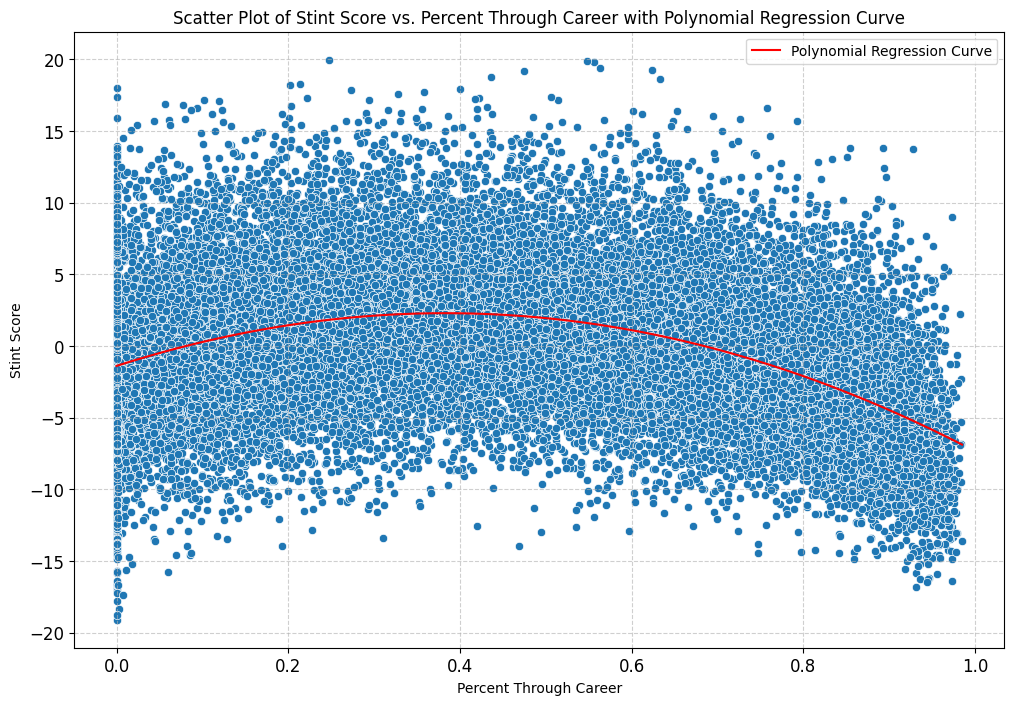

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a polynomial regression curve
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='percent_through_career', y='stint_score')

# Generate predictions for the polynomial regression curve
X_pred = np.linspace(df['percent_through_career'].min(), df['percent_through_career'].max(), 100)
X_pred_poly = np.column_stack((X_pred, X_pred**2, X_pred**3))  # Adjust degree as needed
X_pred_poly = sm.add_constant(X_pred_poly)
y_pred = model.predict(X_pred_poly)

# Plot the polynomial regression curve
plt.plot(X_pred, y_pred, color='red', label='Polynomial Regression Curve')

# Add titles and labels
plt.title('Scatter Plot of Stint Score vs. Percent Through Career with Polynomial Regression Curve')
plt.xlabel('Percent Through Career')
plt.ylabel('Stint Score')
plt.legend()

# Enhance the plot aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


With the polynomial regression model built, we can use it to make predictions and add them to our dataframe based on the player's percent_through_career. From there we can determine how accurate the expected performance turns out to be.

In [8]:
# Generate polynomial features for the 'percent_through_career' column for prediction
df_poly = np.column_stack((df['percent_through_career'], df['percent_through_career']**2, df['percent_through_career']**3))  # Adjust degree as needed
df_poly = sm.add_constant(df_poly)

# Make predictions using the fitted model
df['expected_performance'] = model.predict(df_poly)

# Display the updated dataframe with the new 'expected_performance' column
print(df[['playerID', 'percent_through_career', 'stint_score', 'expected_performance']])

        playerID  percent_through_career  stint_score  expected_performance
0      abdelju01                0.019139    -9.118580             -1.028220
1      abdelju01                0.258373     7.683405              1.903034
2      abdelju01                0.612440     1.435175              0.965649
3       abelcl01                0.000000     7.648768             -1.386126
4       abelcl01                0.132132    -1.878769              0.712714
...          ...                     ...          ...                   ...
24954  zyuzian01                0.457661     2.243539              2.153566
24955  zyuzian01                0.590726     5.757446              1.205445
24956  zyuzian01                0.721774     3.890254             -0.605403
24957  zyuzian01                0.836694   -10.530467             -2.912441
24958  zyuzian01                0.935484    -5.163647             -5.434638

[24959 rows x 4 columns]


From here, we will show how the player's actual performance (stint score) compares to their expected performance. We will use a score system to evaluate the player's performance:
<li>5 - Actual performance is greater than one standard deviation (of expected performance) above expected performance.</li>
<li>4 - Actual performance is within the top 33% of values that fall within the expected performance</li>
<li>3 - Actual performance is within the middle 33% of values that fall within the expected performance</li>
<li>2 - Actual performance is within the bottom 33% of values that fall within the expected performance</li>
<li>1 - Actual performance is lower than on standard deviation below expected peformance</li>

In [9]:
# Calculate residuals and their standard deviation
df['residuals'] = df['stint_score'] - df['expected_performance']
std_residuals = df['residuals'].std()

# Calculate tertile boundaries within the standard deviation range
lower_bound = -std_residuals
upper_bound = std_residuals
tertile_1_upper = lower_bound + (upper_bound - lower_bound) / 3
tertile_2_upper = lower_bound + 2 * (upper_bound - lower_bound) / 3

# Define the conditions for the new column
conditions = [
    (df['stint_score'] > df['expected_performance'] + std_residuals),  # Exceeding
    (df['stint_score'] <= df['expected_performance'] - std_residuals),  # Not Meeting
    ((df['stint_score'] > df['expected_performance'] - std_residuals) & 
     (df['stint_score'] <= df['expected_performance'] - std_residuals + (upper_bound - lower_bound) / 3)),  # Lower Tertile
    ((df['stint_score'] > df['expected_performance'] - std_residuals + (upper_bound - lower_bound) / 3) & 
     (df['stint_score'] <= df['expected_performance'] - std_residuals + 2 * (upper_bound - lower_bound) / 3)),  # Middle Tertile
    ((df['stint_score'] > df['expected_performance'] - std_residuals + 2 * (upper_bound - lower_bound) / 3) & 
     (df['stint_score'] <= df['expected_performance'] + std_residuals))  # Upper Tertile
]

# Define the corresponding categories
choices = [5, 1, 2, 3, 4]

# Create the new column with the conditions
df['performance_evaluation'] = np.select(conditions, choices, default=3)

# Drop the residuals column if not needed
df.drop(columns=['residuals'], inplace=True)

# Display the updated dataframe with the new 'performance_evaluation' column
print(df[['playerID', 'percent_through_career', 'stint_score', 'expected_performance', 'performance_evaluation']])


        playerID  percent_through_career  stint_score  expected_performance  \
0      abdelju01                0.019139    -9.118580             -1.028220   
1      abdelju01                0.258373     7.683405              1.903034   
2      abdelju01                0.612440     1.435175              0.965649   
3       abelcl01                0.000000     7.648768             -1.386126   
4       abelcl01                0.132132    -1.878769              0.712714   
...          ...                     ...          ...                   ...   
24954  zyuzian01                0.457661     2.243539              2.153566   
24955  zyuzian01                0.590726     5.757446              1.205445   
24956  zyuzian01                0.721774     3.890254             -0.605403   
24957  zyuzian01                0.836694   -10.530467             -2.912441   
24958  zyuzian01                0.935484    -5.163647             -5.434638   

       performance_evaluation  
0                  

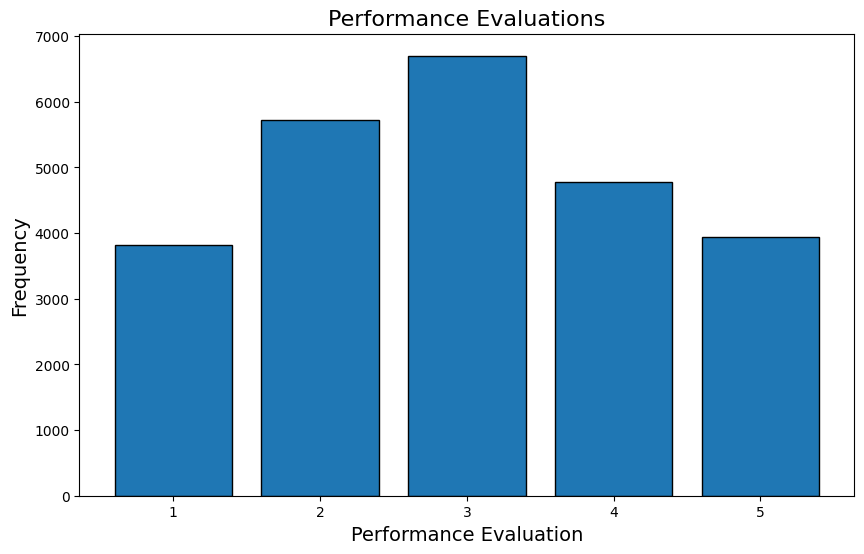

In [10]:
plt.figure(figsize=(10, 6))
# Use 'bar' type and adjust width for spacing
n, bins, patches = plt.hist(df['performance_evaluation'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', rwidth=0.8)
plt.title('Performance Evaluations', fontsize=16)
plt.xlabel('Performance Evaluation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks([1, 2, 3, 4, 5])

# Show the plot
plt.show()

# Initial - Exploratory Data Analysis


## Data Dimension

In [11]:
df.shape

(24959, 58)

## Dataframe contents

In [12]:
df.head()

playerID  year  stint tmID pos    GP    G     A   Pts   PIM  ...  \
0  abdelju01  2009      1  DET   L  50.0  3.0   3.0   6.0  35.0  ...   
1  abdelju01  2010      1  DET   L  74.0  7.0  12.0  19.0  61.0  ...   
2  abdelju01  2011      1  DET   L  81.0  8.0  14.0  22.0  62.0  ...   
3   abelcl01  1926      1  NYR   D  44.0  8.0   4.0  12.0  78.0  ...   
4   abelcl01  1927      1  NYR   D  23.0  0.0   1.0   1.0  28.0  ...   

   SOG_per_game_score  award_count_per_game_score  +/-_score  stint_score  \
0           -0.248378                         0.0  -1.282503    -9.118580   
1            1.329897                         0.0   1.157381     7.683405   
2           -1.081518                         0.0   0.125122     1.435175   
3            0.000000                         0.0   0.000000     7.648768   
4            0.000000                         0.0   0.000000    -1.878769   

   stint_vs_prev_stint  teammates_same_nationality  tsm_vs_prev_stint   age  \
0                  NaN                           3                NaN  22.0   
1               better                           3          no change  23.0   
2                worse                           1              fewer  24.0   
3                  NaN                           0                NaN  26.0   
4                worse                           0          no change  27.0   

   expected_performance  performance_evaluation  
0             -1.028220                       1  
1              1.903034                       5  
2              0.965649                       3  
3             -1.386126                       5  
4              0.712714                       2  

[5 rows x 58 columns]

## Check for missing values

In [13]:
df.isnull().sum()

playerID                         0
year                             0
stint                            0
tmID                             0
pos                              0
GP                               0
G                                0
A                                0
Pts                              0
PIM                              0
+/-                              0
PPG                              0
PPA                              0
SHG                              0
SHA                              0
GWG                              0
SOG                              0
stint_index                      0
career_games                     0
total_GP_prior_to_stint          0
percent_through_career           0
award_count                      0
firstName                        0
lastName                         0
height                           0
weight                           0
birthYear                        0
birthCountry                     0
G_per_game          

## Overview of data types of each column in the dataframe

In [14]:
df.dtypes


playerID                       object
year                            int64
stint                           int64
tmID                           object
pos                            object
GP                            float64
G                             float64
A                             float64
Pts                           float64
PIM                           float64
+/-                           float64
PPG                           float64
PPA                           float64
SHG                           float64
SHA                           float64
GWG                           float64
SOG                           float64
stint_index                     int64
career_games                  float64
total_GP_prior_to_stint       float64
percent_through_career        float64
award_count                   float64
firstName                      object
lastName                       object
height                        float64
weight                        float64
birthYear   

In [15]:
df.select_dtypes(include='number')

year  stint    GP    G     A   Pts   PIM   +/-  PPG  PPA  ...  \
0      2009      1  50.0  3.0   3.0   6.0  35.0 -11.0  0.0  0.0  ...   
1      2010      1  74.0  7.0  12.0  19.0  61.0  15.0  0.0  0.0  ...   
2      2011      1  81.0  8.0  14.0  22.0  62.0   4.0  0.0  0.0  ...   
3      1926      1  44.0  8.0   4.0  12.0  78.0   0.0  0.0  0.0  ...   
4      1927      1  23.0  0.0   1.0   1.0  28.0   0.0  0.0  0.0  ...   
...     ...    ...   ...  ...   ...   ...   ...   ...  ...  ...  ...   
24954  2002      2  66.0  4.0  12.0  16.0  34.0  -7.0  2.0  5.0  ...   
24955  2003      1  65.0  8.0  13.0  21.0  48.0   4.0  4.0  4.0  ...   
24956  2005      1  57.0  7.0  11.0  18.0  50.0 -12.0  4.0  4.0  ...   
24957  2006      1  49.0  1.0   5.0   6.0  30.0  -2.0  0.0  0.0  ...   
24958  2007      1  32.0  2.0   3.0   5.0  38.0 -11.0  1.0  1.0  ...   

       SHA_per_game_score  GWG_per_game_score  SOG_per_game_score  \
0               -0.707107           -1.409907           -0.248378   
1                1.414214            0.800463            1.329897   
2               -0.707107            0.609444           -1.081518   
3                0.000000            0.000000            0.000000   
4                0.000000            0.000000            0.000000   
...                   ...                 ...                 ...   
24954            3.000000           -0.724184            1.202424   
24955           -0.333333            0.597946            0.817889   
24956           -0.333333            0.783508            0.143995   
24957           -0.333333           -0.724184           -2.149798   
24958           -0.333333           -0.724184           -1.025542   

       award_count_per_game_score  +/-_score  stint_score  \
0                             0.0  -1.282503    -9.118580   
1                             0.0   1.157381     7.683405   
2                             0.0   0.125122     1.435175   
3                             0.0   0.000000     7.648768   
4                             0.0   0.000000    -1.878769   
...                           ...        ...          ...   
24954                         0.0  -0.523207     2.243539   
24955                         0.0   1.032273     5.757446   
24956                         0.0  -1.230243     3.890254   
24957                         0.0   0.183829   -10.530467   
24958                         0.0  -1.088836    -5.163647   

       teammates_same_nationality   age  expected_performance  \
0                               3  22.0             -1.028220   
1                               3  23.0              1.903034   
2                               1  24.0              0.965649   
3                               0  26.0             -1.386126   
4                               0  27.0              0.712714   
...                           ...   ...                   ...   
24954                           0  24.0              2.153566   
24955                           0  25.0              1.205445   
24956                           0  27.0             -0.605403   
24957                           0  28.0             -2.912441   
24958                           1  29.0             -5.434638   

       performance_evaluation  
0                           1  
1                           5  
2                           3  
3                           5  
4                           2  
...                       ...  
24954                       3  
24955                       4  
24956                       4  
24957                       1  
24958                       3  

[24959 rows x 50 columns]

In [16]:
df.select_dtypes(include='object')

playerID tmID pos firstName    lastName birthCountry  \
0      abdelju01  DET   L    Justin  Abdelkader          USA   
1      abdelju01  DET   L    Justin  Abdelkader          USA   
2      abdelju01  DET   L    Justin  Abdelkader          USA   
3       abelcl01  NYR   D  Clarence        Abel          USA   
4       abelcl01  NYR   D  Clarence        Abel          USA   
...          ...  ...  ..       ...         ...          ...   
24954  zyuzian01  MIN   D    Andrei      Zyuzin       Russia   
24955  zyuzian01  MIN   D    Andrei      Zyuzin       Russia   
24956  zyuzian01  MIN   D    Andrei      Zyuzin       Russia   
24957  zyuzian01  CAL   D    Andrei      Zyuzin       Russia   
24958  zyuzian01  CHI   D    Andrei      Zyuzin       Russia   

      stint_vs_prev_stint tsm_vs_prev_stint  
0                     NaN               NaN  
1                  better         no change  
2                   worse             fewer  
3                     NaN               NaN  
4                   worse         no change  
...                   ...               ...  
24954              better             fewer  
24955              better         no change  
24956               worse         no change  
24957               worse         no change  
24958              better              more  

[24959 rows x 8 columns]

## Data Distributions

<Figure size 1200x800 with 0 Axes>

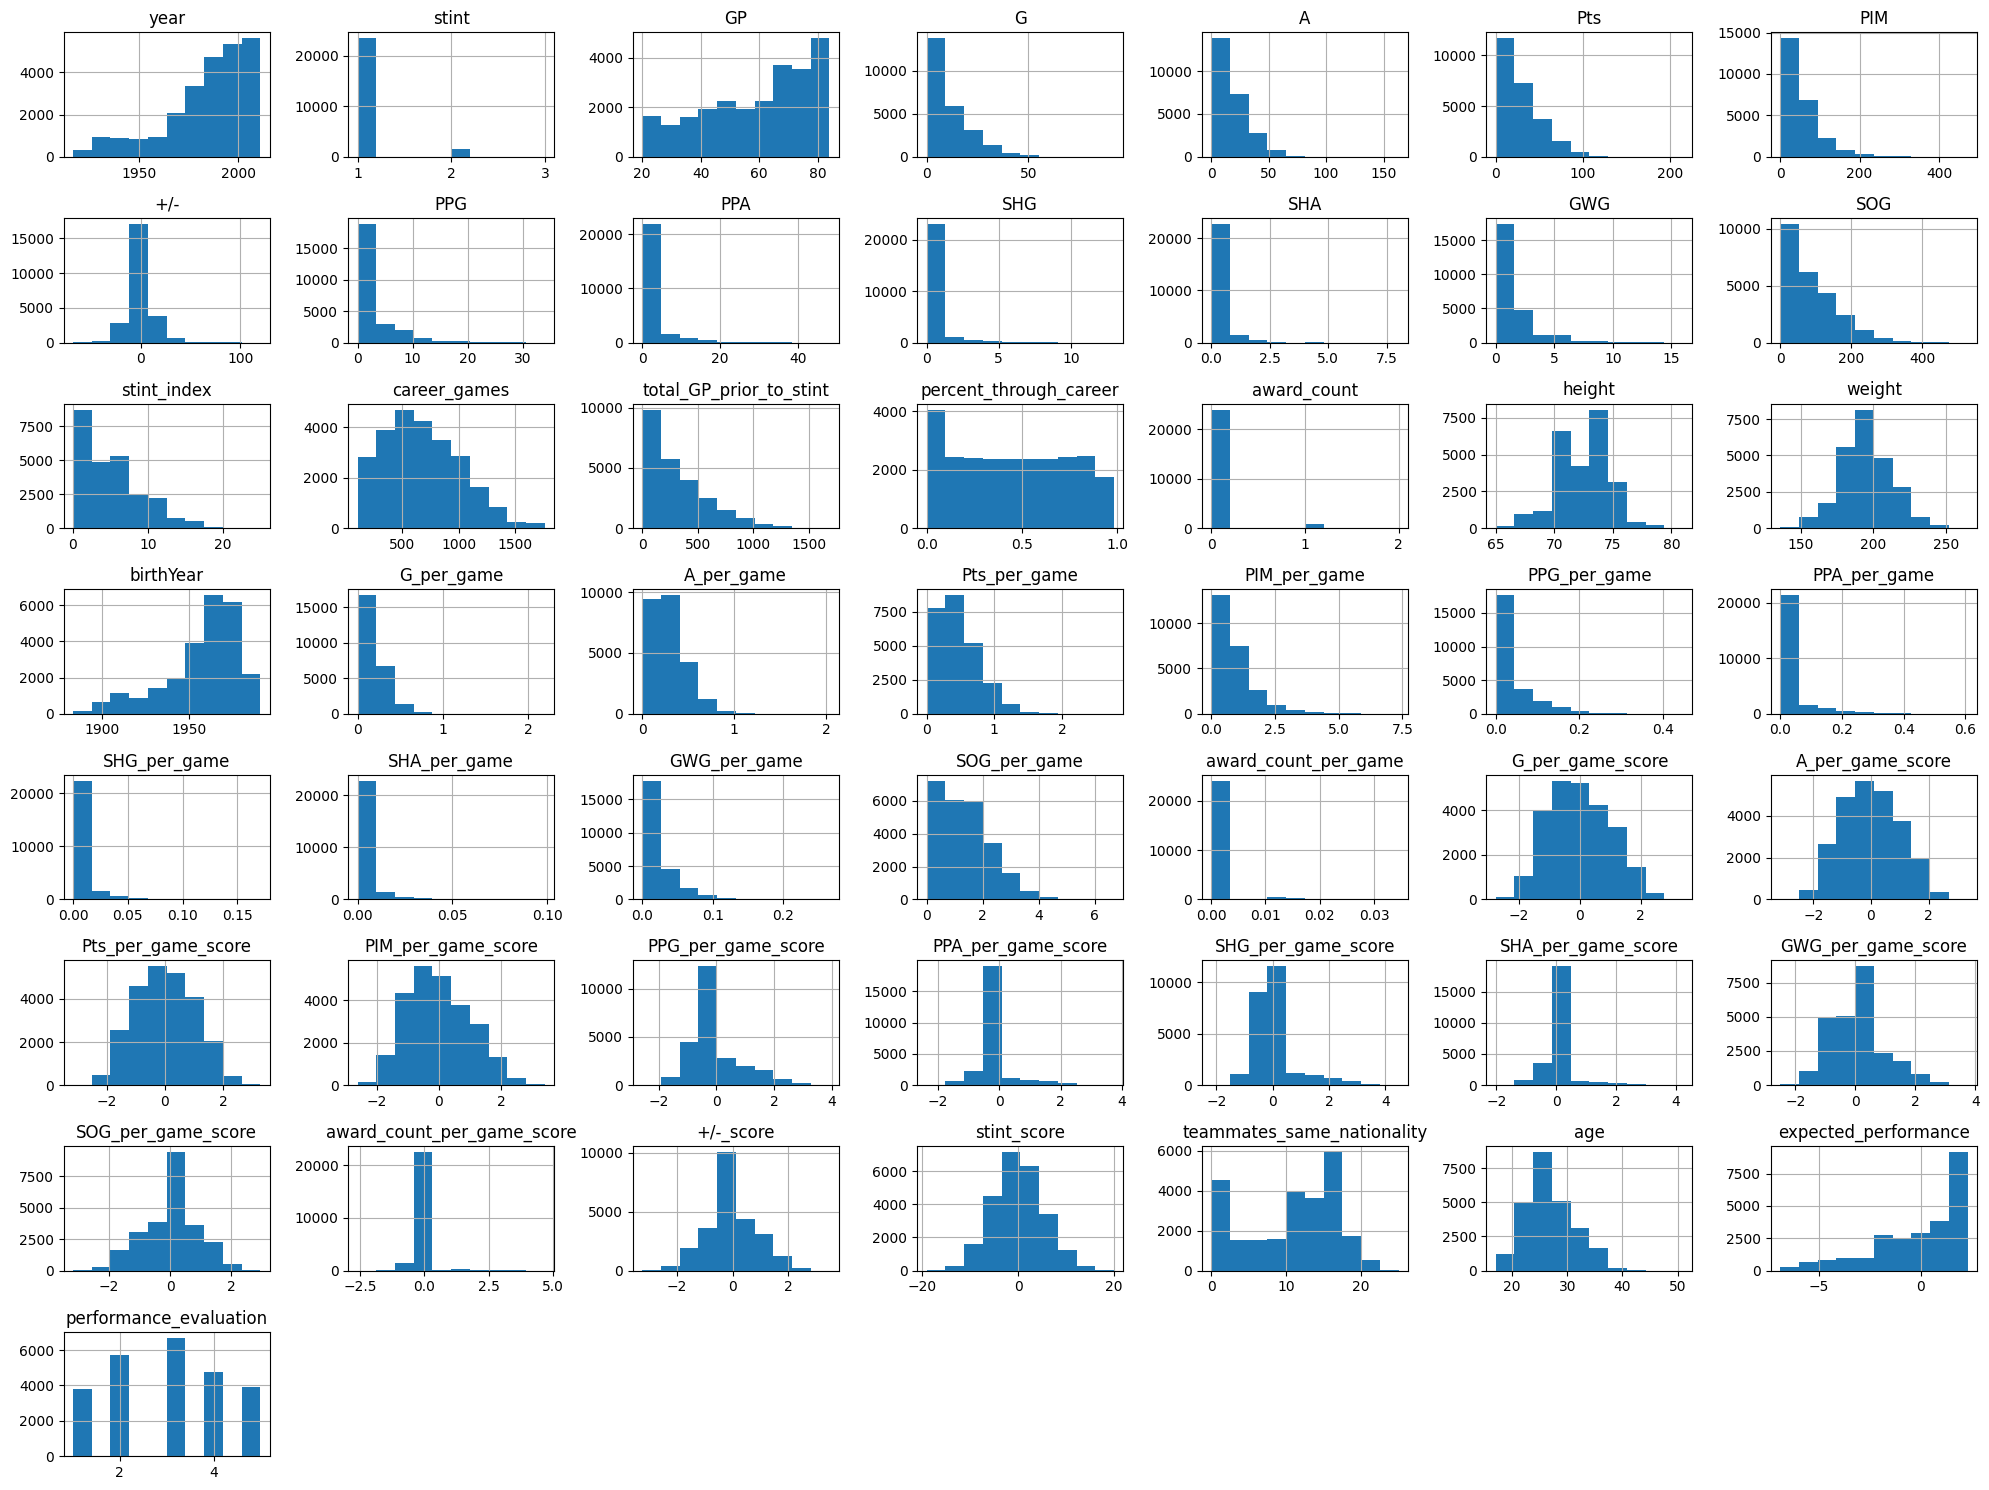

In [17]:
# Data Distribution
plt.figure(figsize=(12, 8))
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

## Data Correlations

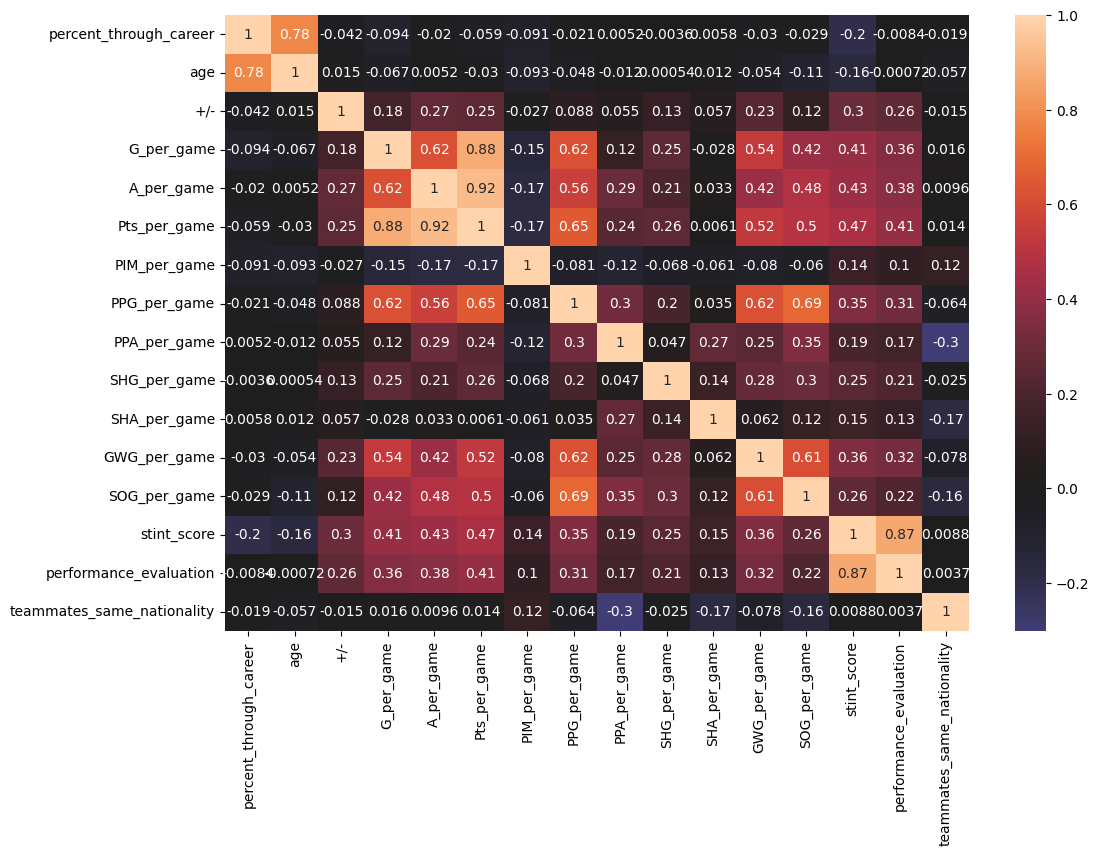

In [18]:
# Relationships Between Variables

# list variables
numerical_variables = [
    'percent_through_career',
    'age',
    '+/-',
    'G_per_game',
    'A_per_game',
    'Pts_per_game',
    'PIM_per_game',
    'PPG_per_game',
    'PPA_per_game',
    'SHG_per_game',
    'SHA_per_game',
    'GWG_per_game',
    'SOG_per_game',
    'stint_score',
    'performance_evaluation',
    'teammates_same_nationality'
]

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.show()

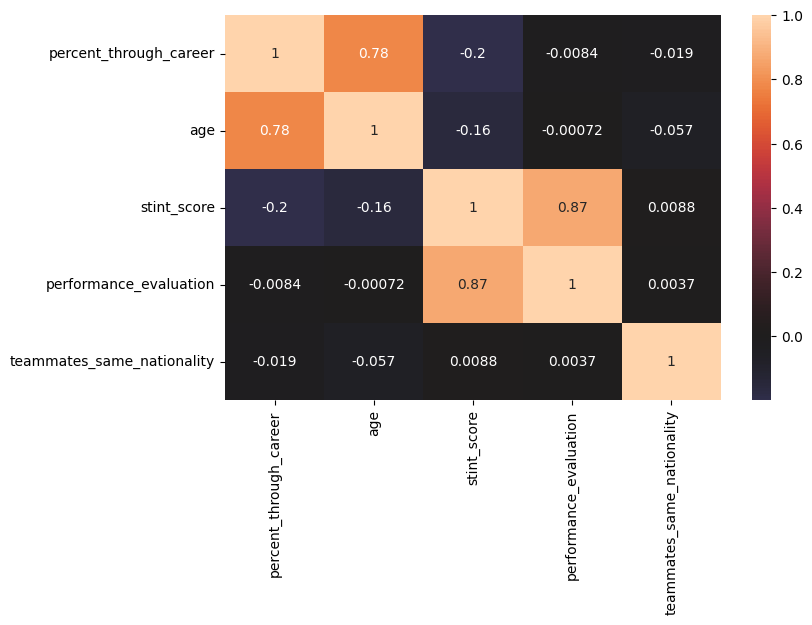

In [19]:
# list focused variables
numerical_variables = [
    'percent_through_career',
    'age',
    # '+/-',
    # 'G_per_game',
    # 'A_per_game',
    # 'Pts_per_game',
    # 'PIM_per_game',
    # 'PPG_per_game',
    # 'PPA_per_game',
    # 'SHG_per_game',
    # 'SHA_per_game',
    # 'GWG_per_game',
    # 'SOG_per_game',
    'stint_score',
    ''
    'performance_evaluation',
    'teammates_same_nationality'
]


plt.figure(figsize=(8, 5))
correlation_matrix = df[numerical_variables].corr()
sns.heatmap(correlation_matrix, annot=True, center=0)
plt.show()

## Countries
We are going to narrow our scope and look at specific birth countries, prioritizing those with the highest average number of teammates.

In [20]:
# Group by 'birthCountry' and calculate the average number of 'teammates_same_nationality'
avg_teammates_same_nationality = df.groupby('birthCountry')['teammates_same_nationality'].mean()

# Convert to a DataFrame and sort by the average number of 'teammates_same_nationality'
avg_teammates_same_nationality = avg_teammates_same_nationality.reset_index().sort_values(by='teammates_same_nationality', ascending=False)

# Display the result
print(avg_teammates_same_nationality)

         birthCountry  teammates_same_nationality
4              Canada                   13.724428
29                USA                    3.372253
26             Sweden                    1.345733
5      Czech Republic                    1.292857
20             Russia                    1.228277
8             Finland                    0.712154
22           Slovakia                    0.583333
1             Belarus                    0.250000
21           Scotland                    0.227273
10            Germany                    0.206349
31            Ukraine                    0.189474
7             England                    0.037736
0             Austria                    0.000000
11            Ireland                    0.000000
9              France                    0.000000
2              Brazil                    0.000000
6             Denmark                    0.000000
3   Brunei Darussalam                    0.000000
17             Norway                    0.000000


There is a significant drop off in average teammates after Slovakia who has the 7th highest average number of teammates.  At this point, the top 7 countries here look like they may have enough data for us to make observations.

Now we will look at total unique players per country:

In [21]:
# Group by 'birthCountry' and count unique 'playerID's
unique_players_per_country = df.groupby('birthCountry')['playerID'].nunique()

# Convert to a DataFrame and sort by the count of unique 'playerID's
unique_players_per_country = unique_players_per_country.reset_index().sort_values(by='playerID', ascending=False)

# Rename the columns for clarity
unique_players_per_country.columns = ['birthCountry', 'unique_playerIDs']

# Display the result
print(unique_players_per_country)

         birthCountry  unique_playerIDs
4              Canada              2070
29                USA               378
26             Sweden               118
5      Czech Republic                99
20             Russia                77
8             Finland                60
22           Slovakia                31
10            Germany                14
31            Ukraine                 9
30               USSR                 6
7             England                 5
21           Scotland                 5
19             Poland                 5
6             Denmark                 4
14             Latvia                 4
0             Austria                 3
1             Belarus                 3
15          Lithuania                 2
32          Venezuela                 2
27        Switzerland                 2
11            Ireland                 2
12              Italy                 1
2              Brazil                 1
3   Brunei Darussalam                 1


Once more, there is a significant drop after the 7th country, Slovakia. 

### Canada
Canada has greater representation than any other country in the NHL.

<Figure size 1200x800 with 0 Axes>

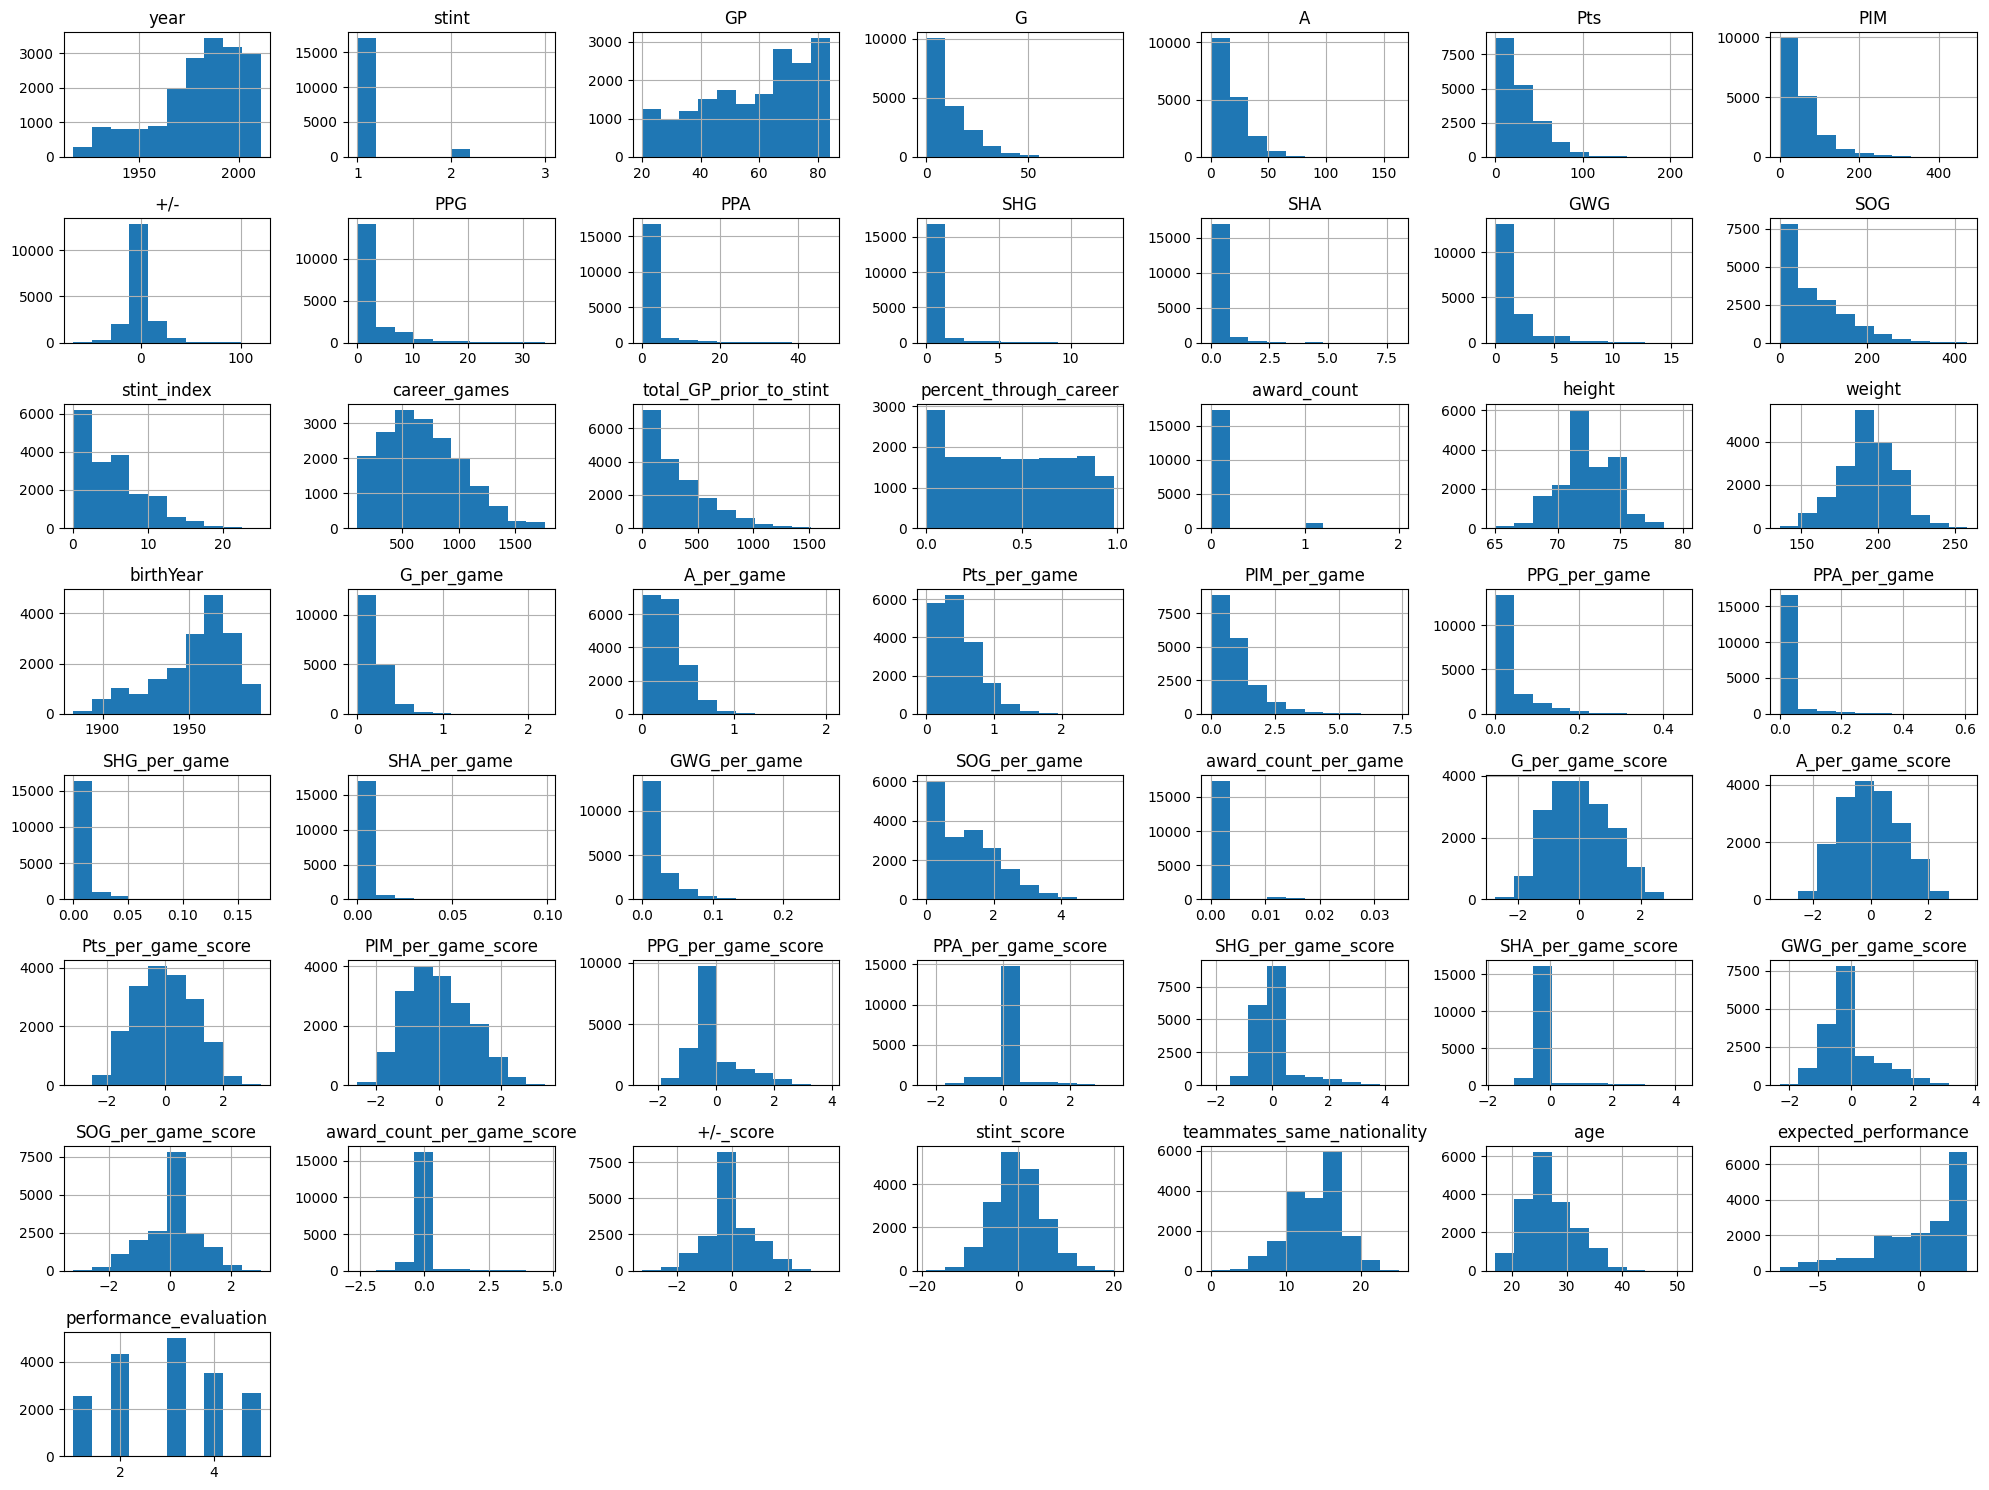

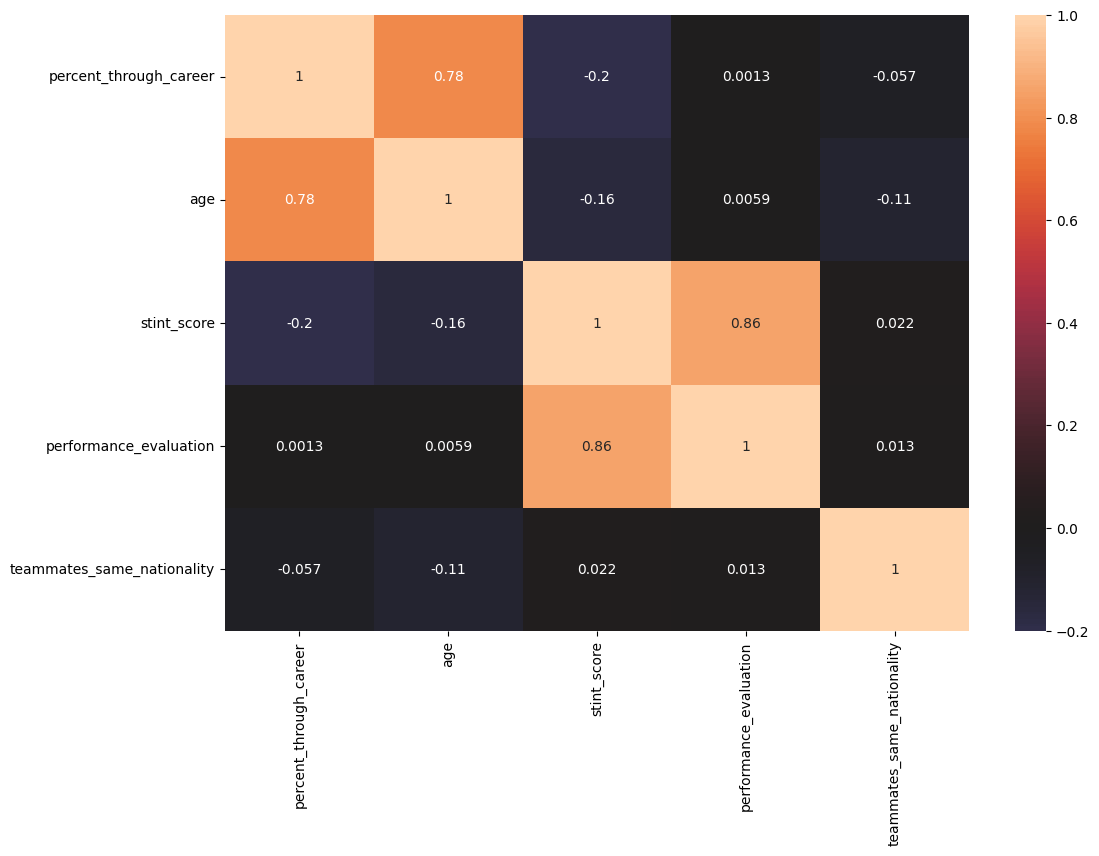

In [22]:
def show_distribution_for_country(country):

    country_df = df[df['birthCountry'] == country]

    # Data Distribution
    plt.figure(figsize=(12, 8))
    country_df.hist(figsize=(20, 15))
    plt.tight_layout()
    plt.show()

def show_correlation_for_country(country):
    # list focused variables
    numerical_variables = [
        'percent_through_career',
        'age',
        # '+/-',
        # 'G_per_game',
        # 'A_per_game',
        # 'Pts_per_game',
        # 'PIM_per_game',
        # 'PPG_per_game',
        # 'PPA_per_game',
        # 'SHG_per_game',
        # 'SHA_per_game',
        # 'GWG_per_game',
        # 'SOG_per_game',
        'stint_score',
        'performance_evaluation',
        'teammates_same_nationality'
    ]

    country_df = df[df['birthCountry'] == country]

    plt.figure(figsize=(12, 8))
    correlation_matrix = country_df[numerical_variables].corr()
    sns.heatmap(correlation_matrix, annot=True, center=0)
    plt.show()

show_distribution_for_country('Canada')
show_correlation_for_country('Canada')


### USA
The USA is the home to the majority of the teams in the NHL and has the second largest representation within the


<Figure size 1200x800 with 0 Axes>

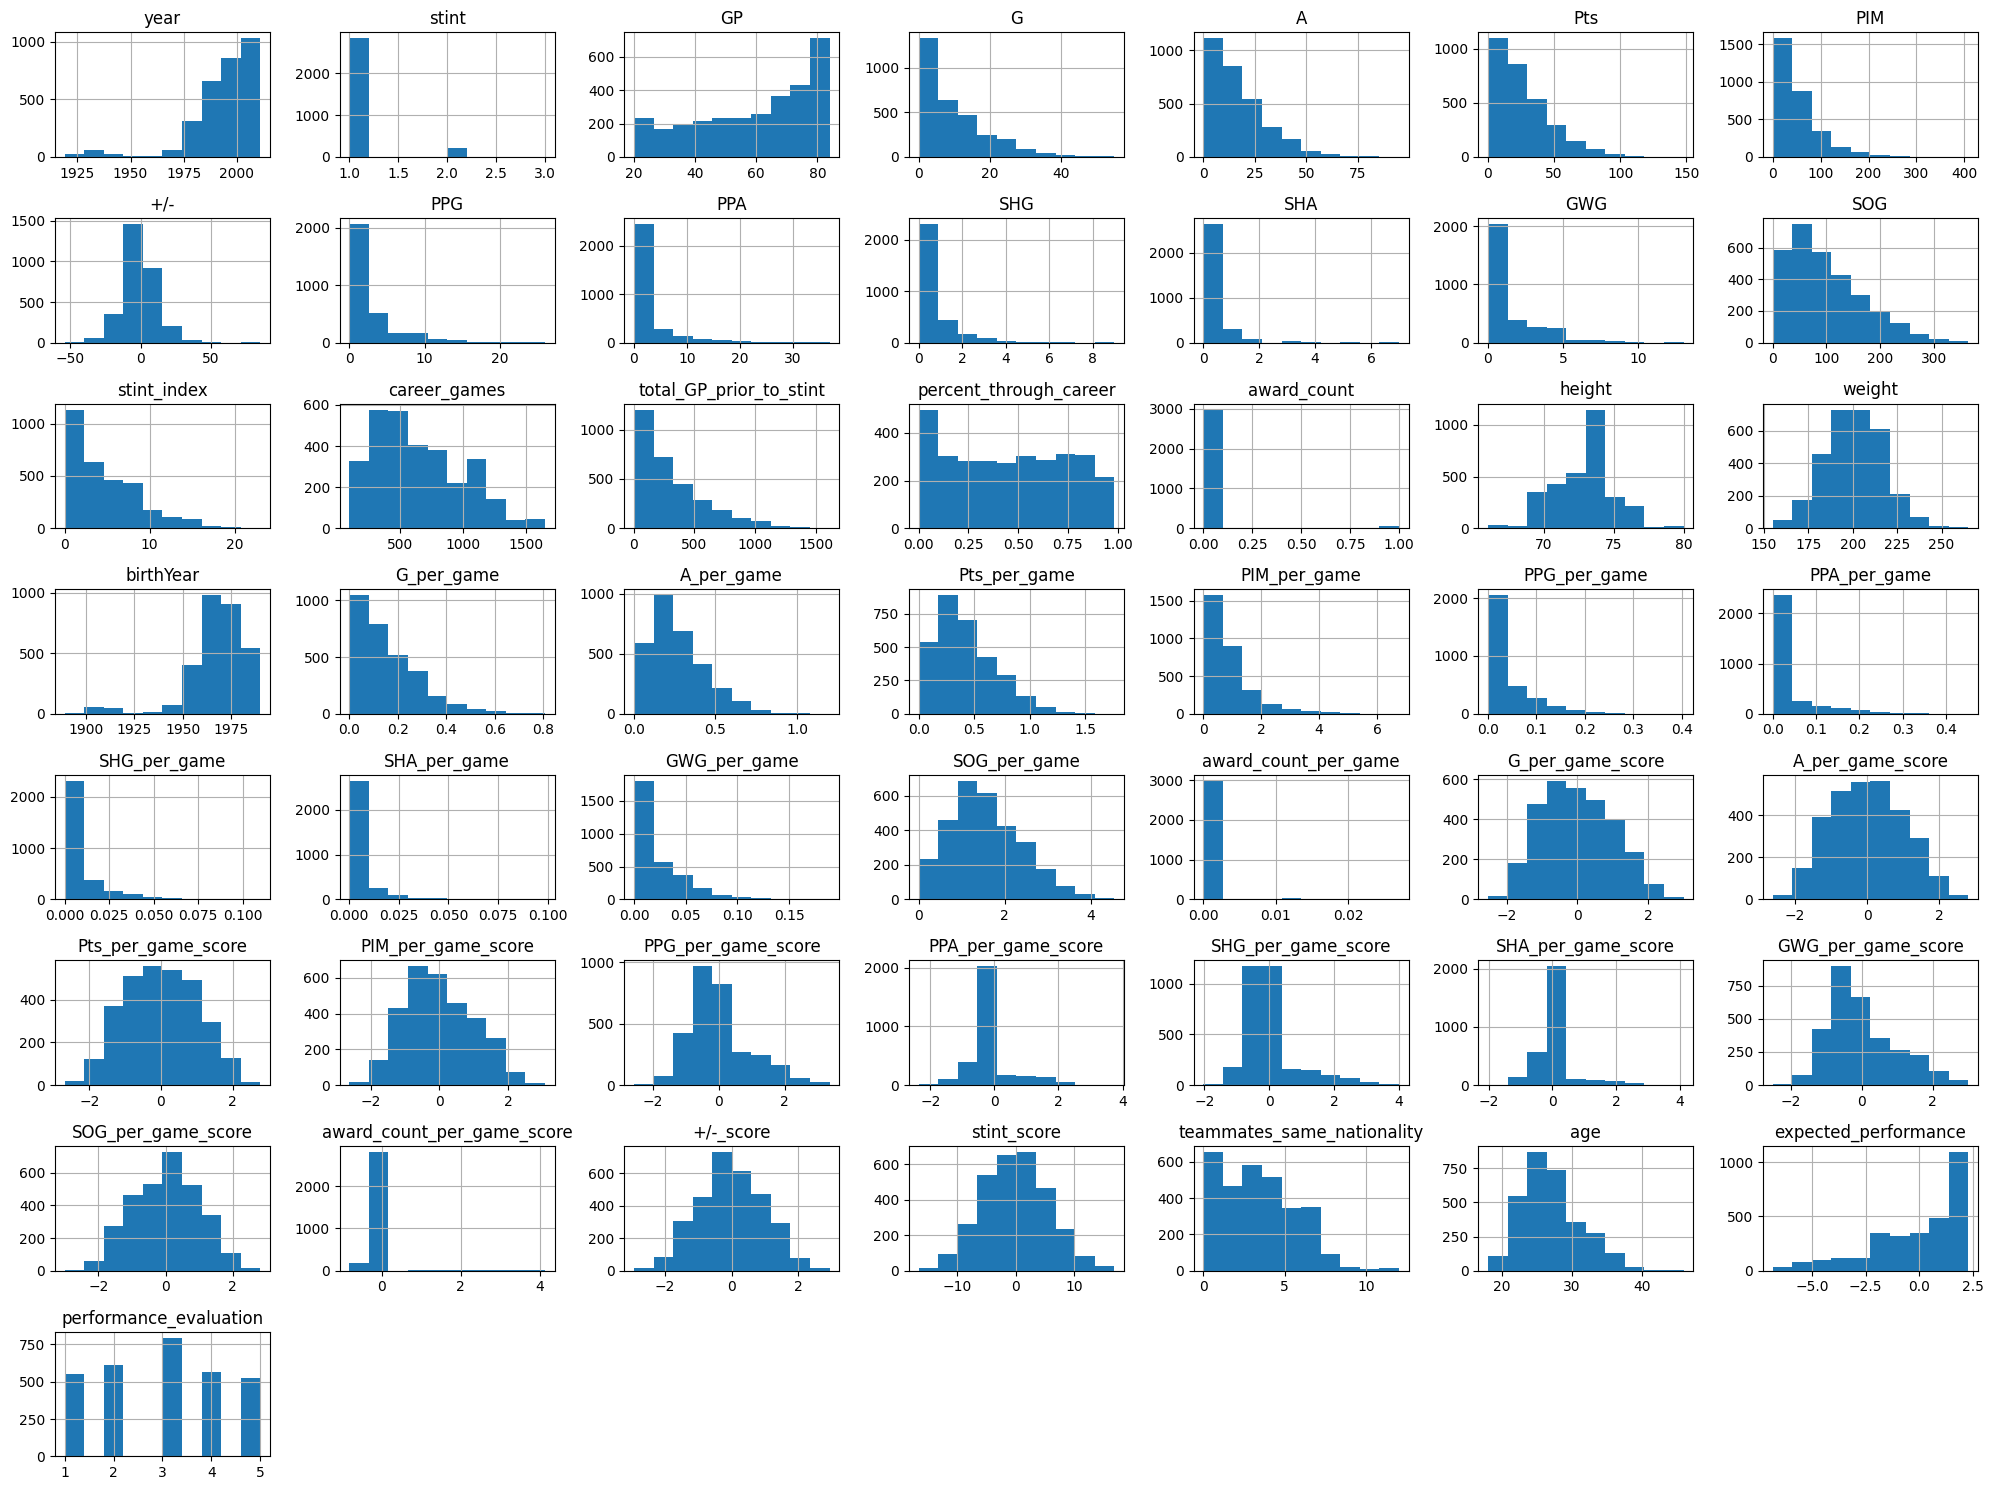

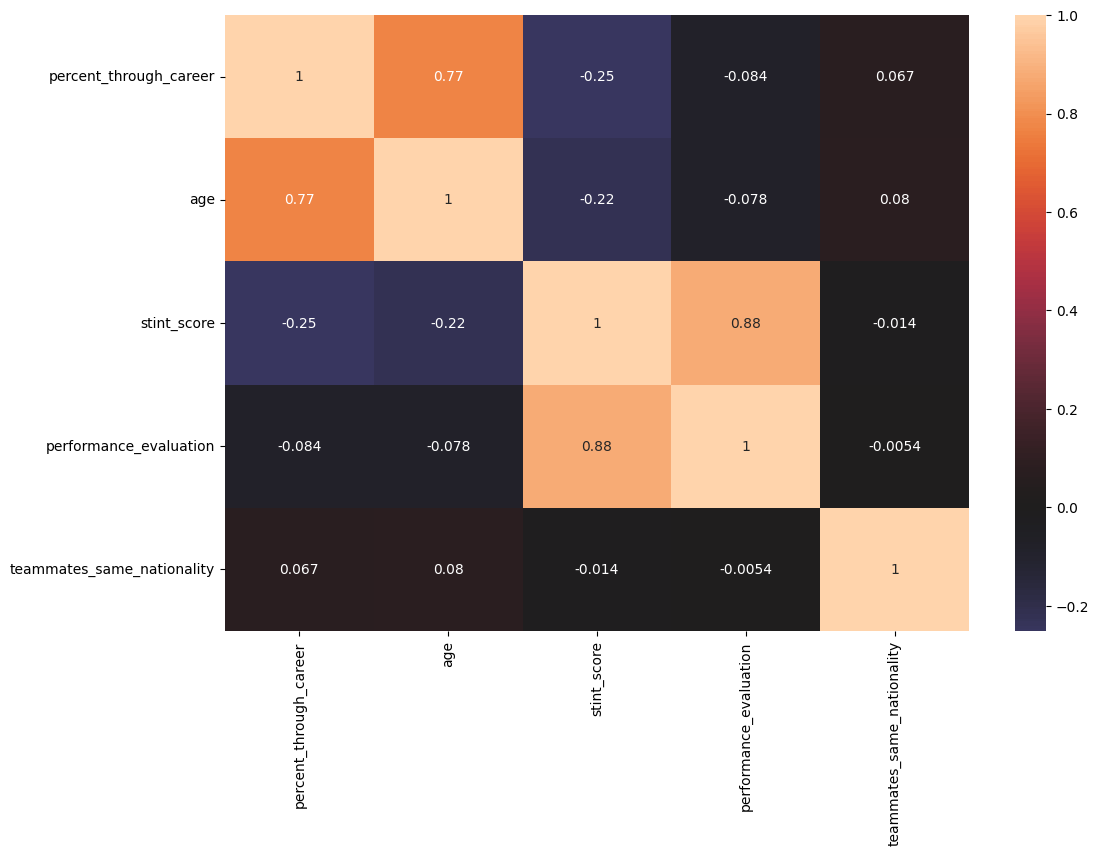

In [23]:
country = 'USA'

show_distribution_for_country(country)
show_correlation_for_country(country)

### Sweden

<Figure size 1200x800 with 0 Axes>

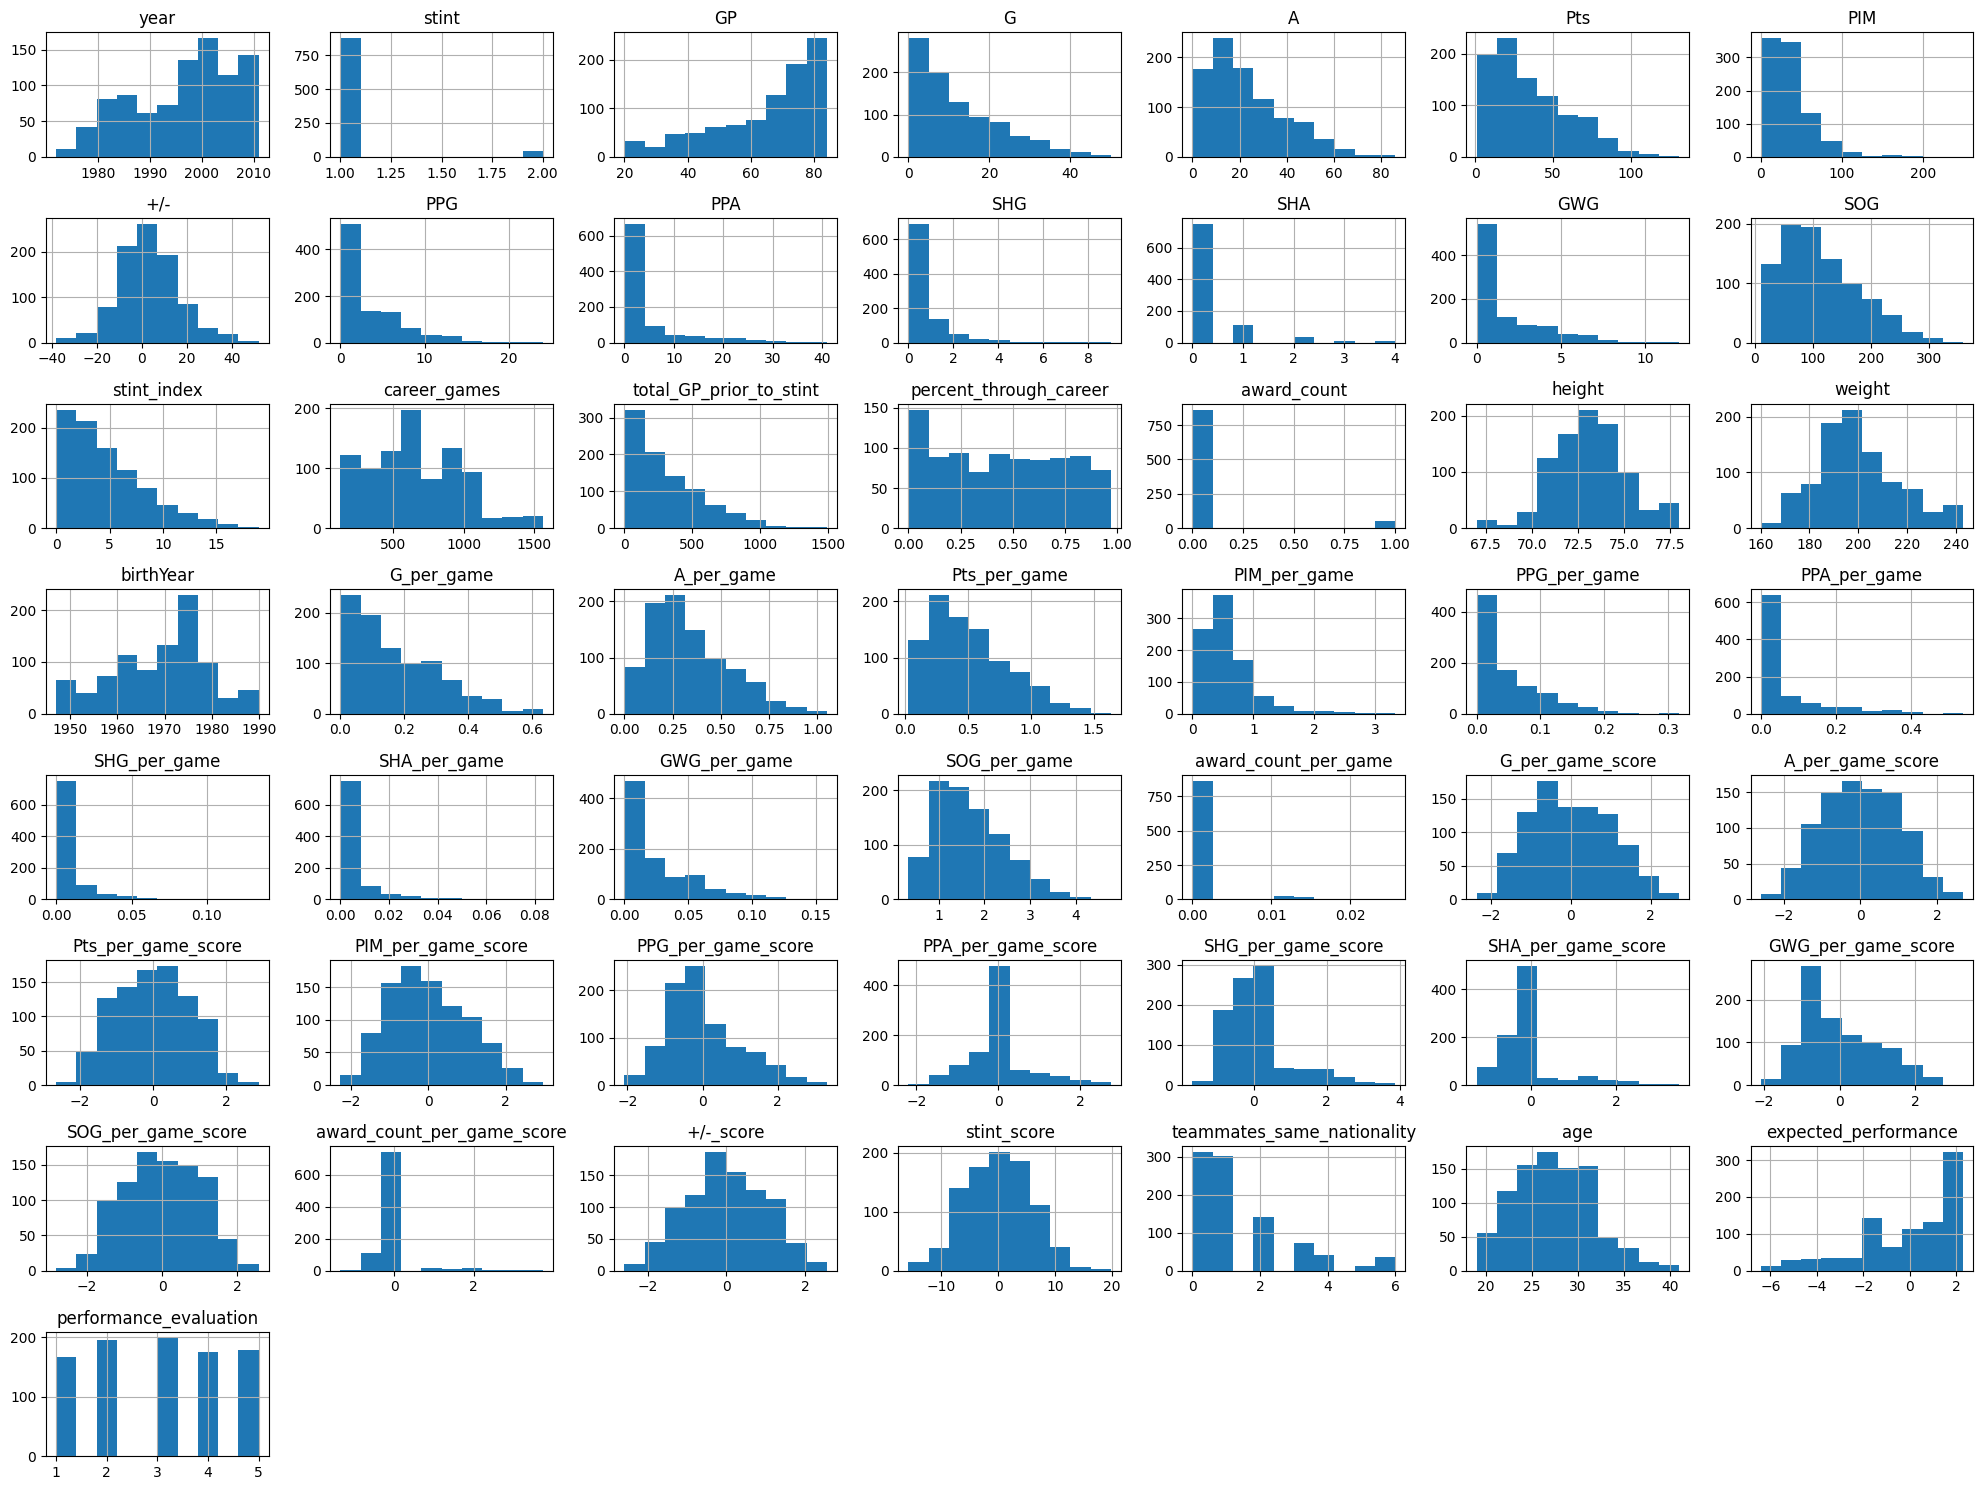

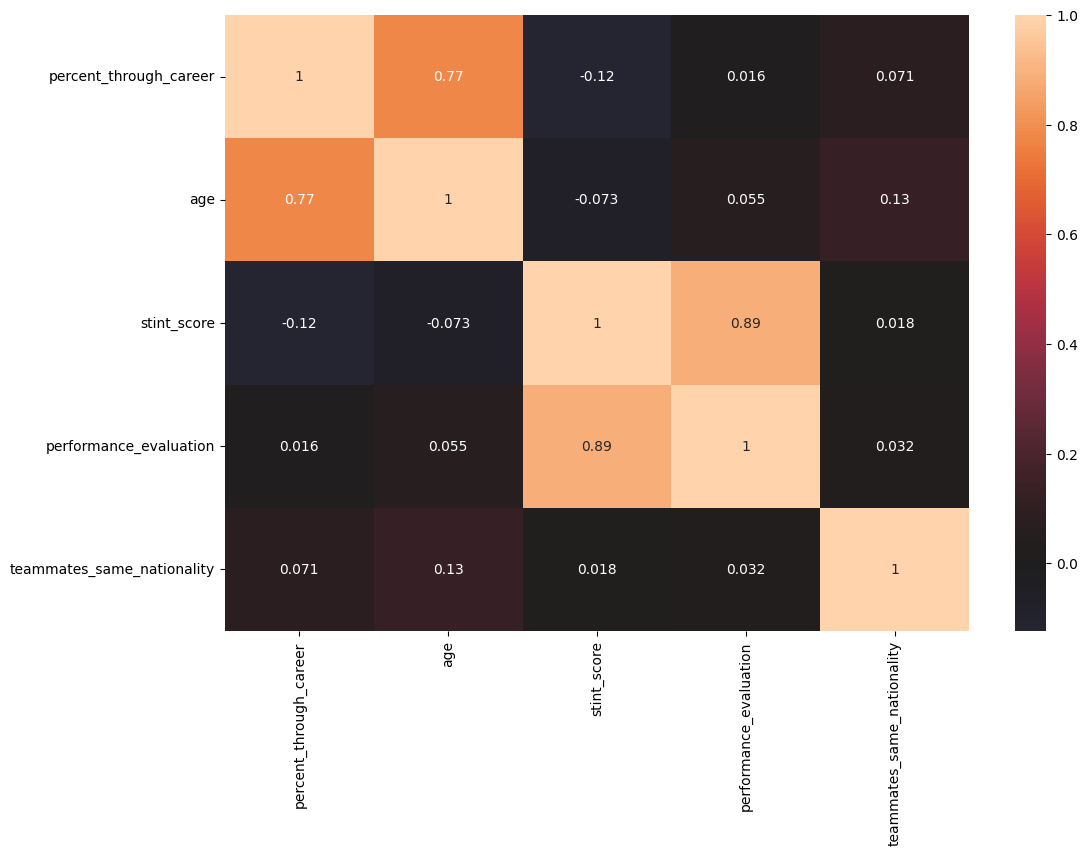

In [24]:
country = 'Sweden'

show_distribution_for_country(country)
show_correlation_for_country(country)

### Czech Republic

<Figure size 1200x800 with 0 Axes>

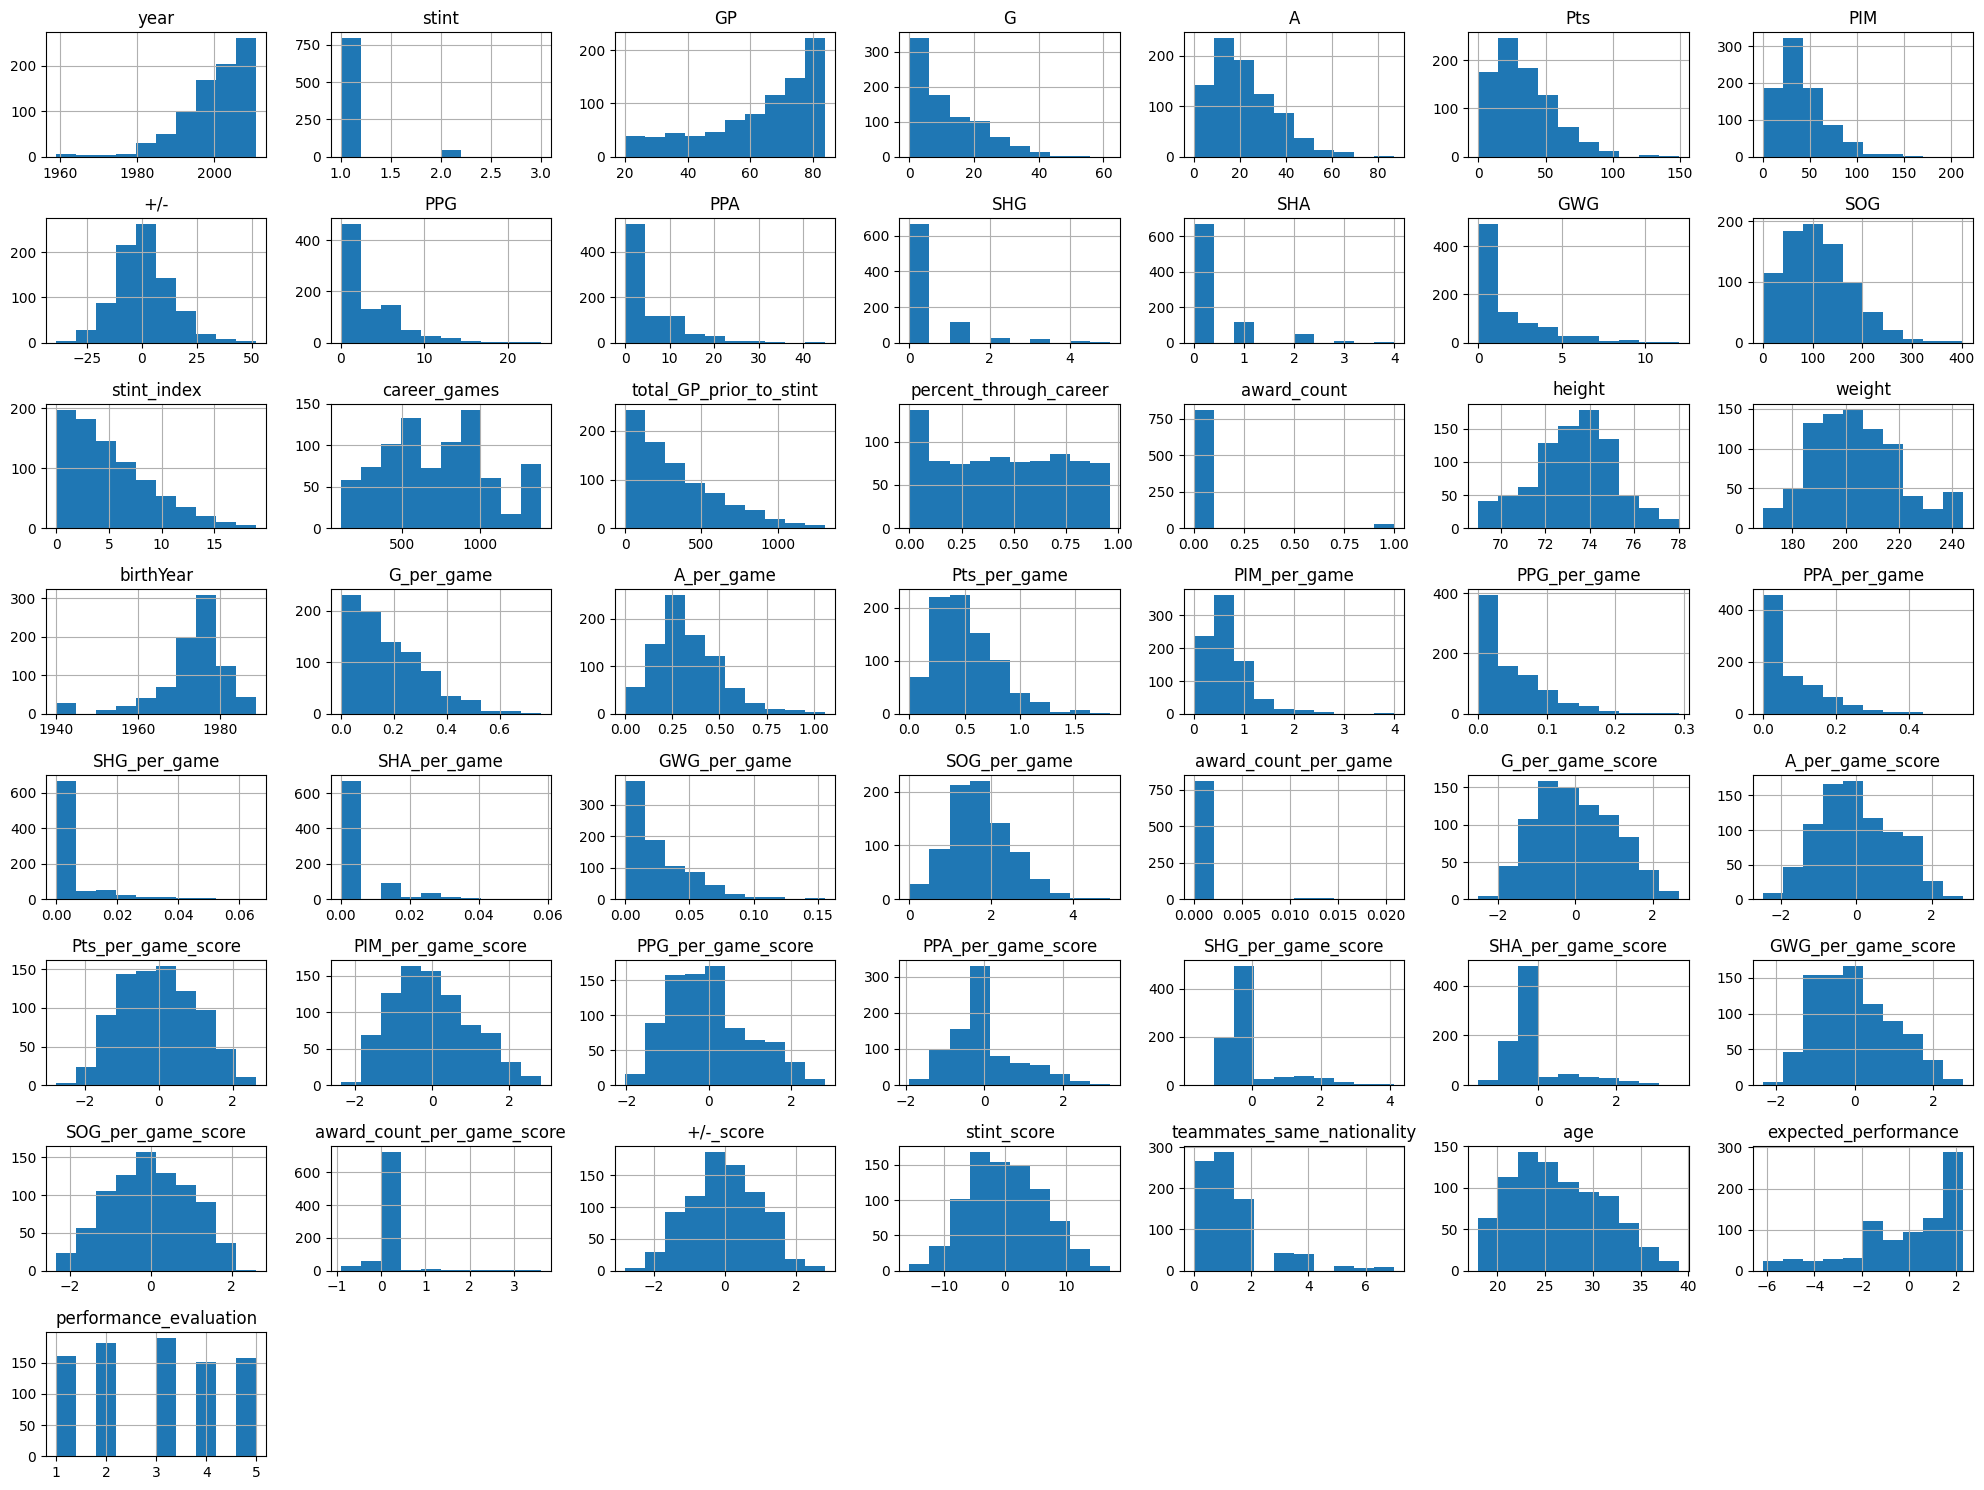

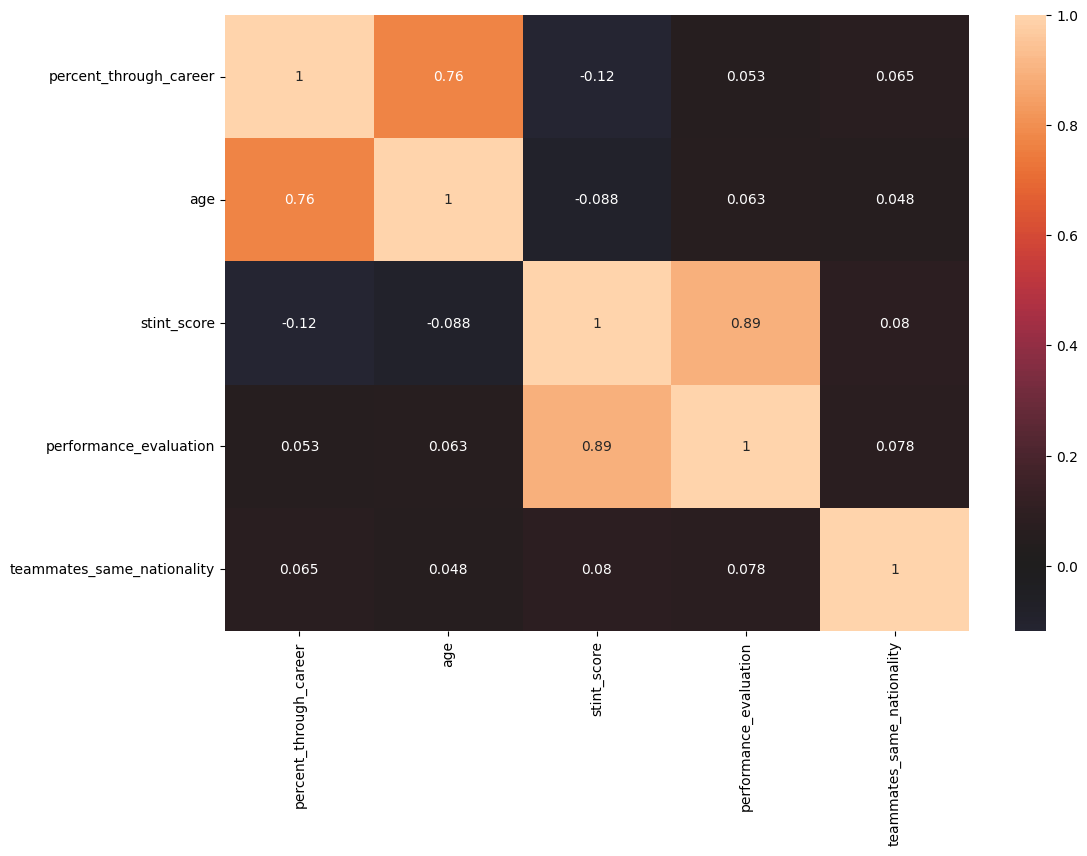

In [25]:
country = 'Czech Republic'

show_distribution_for_country(country)
show_correlation_for_country(country)

### Russia

<Figure size 1200x800 with 0 Axes>

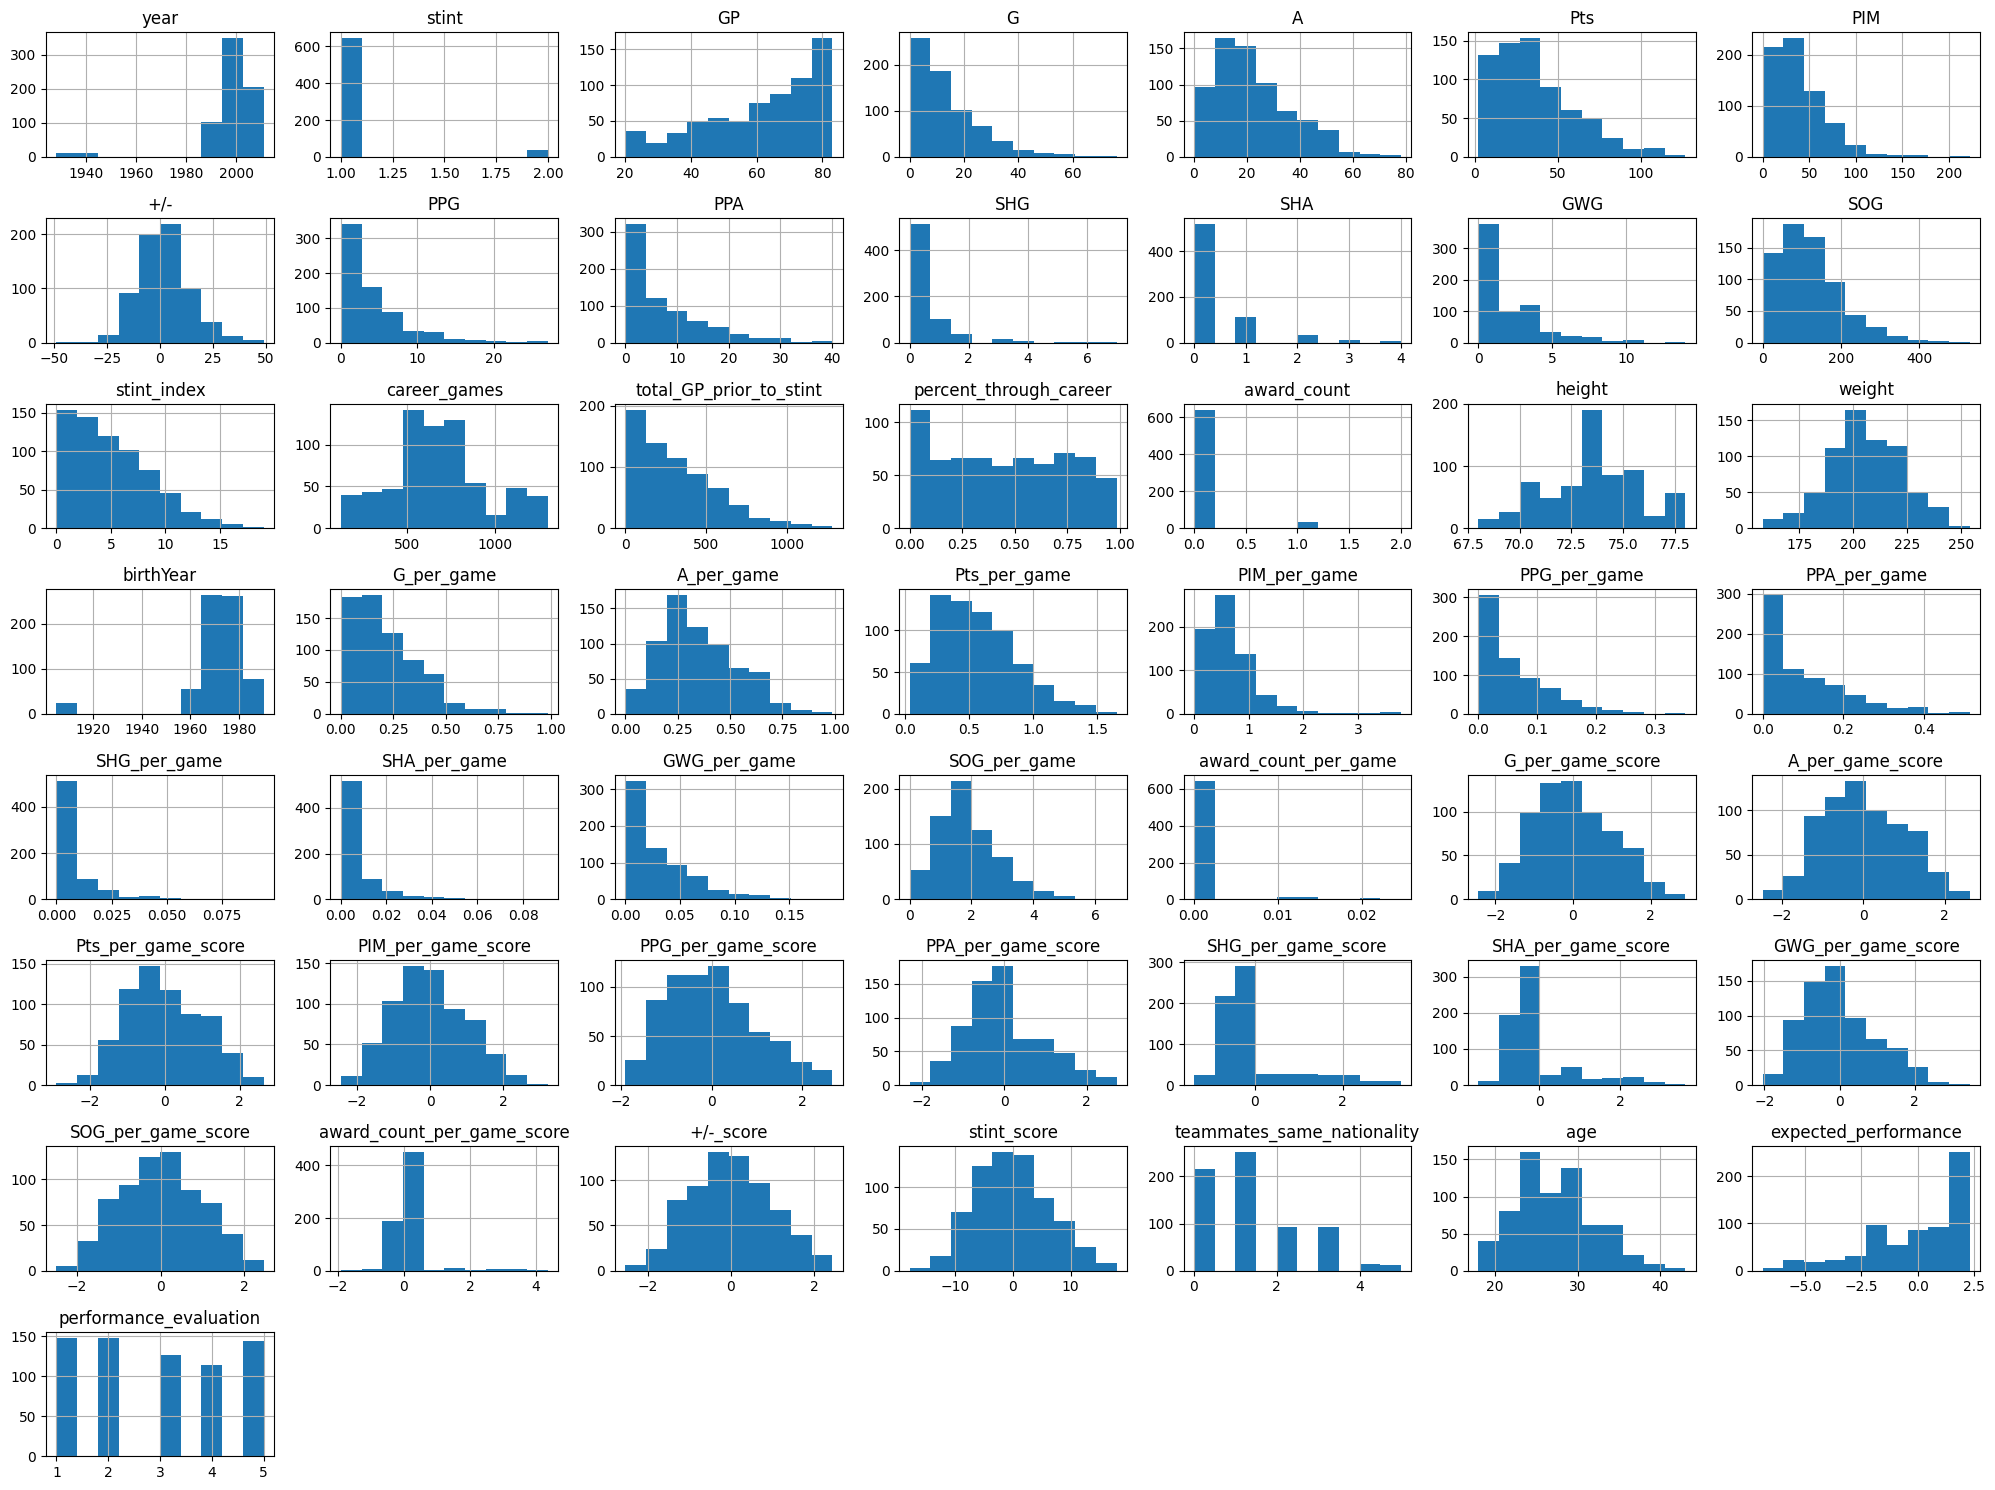

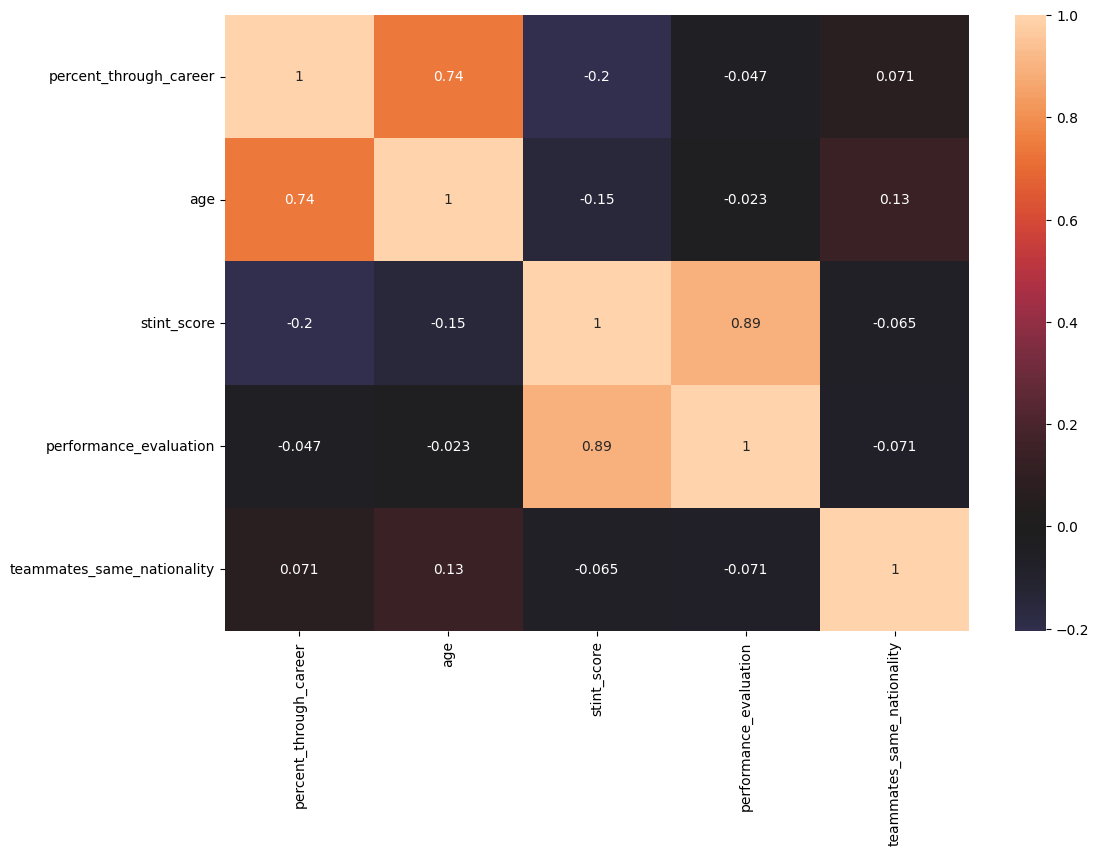

In [26]:
country = 'Russia'

show_distribution_for_country(country)
show_correlation_for_country(country)

### Finland

<Figure size 1200x800 with 0 Axes>

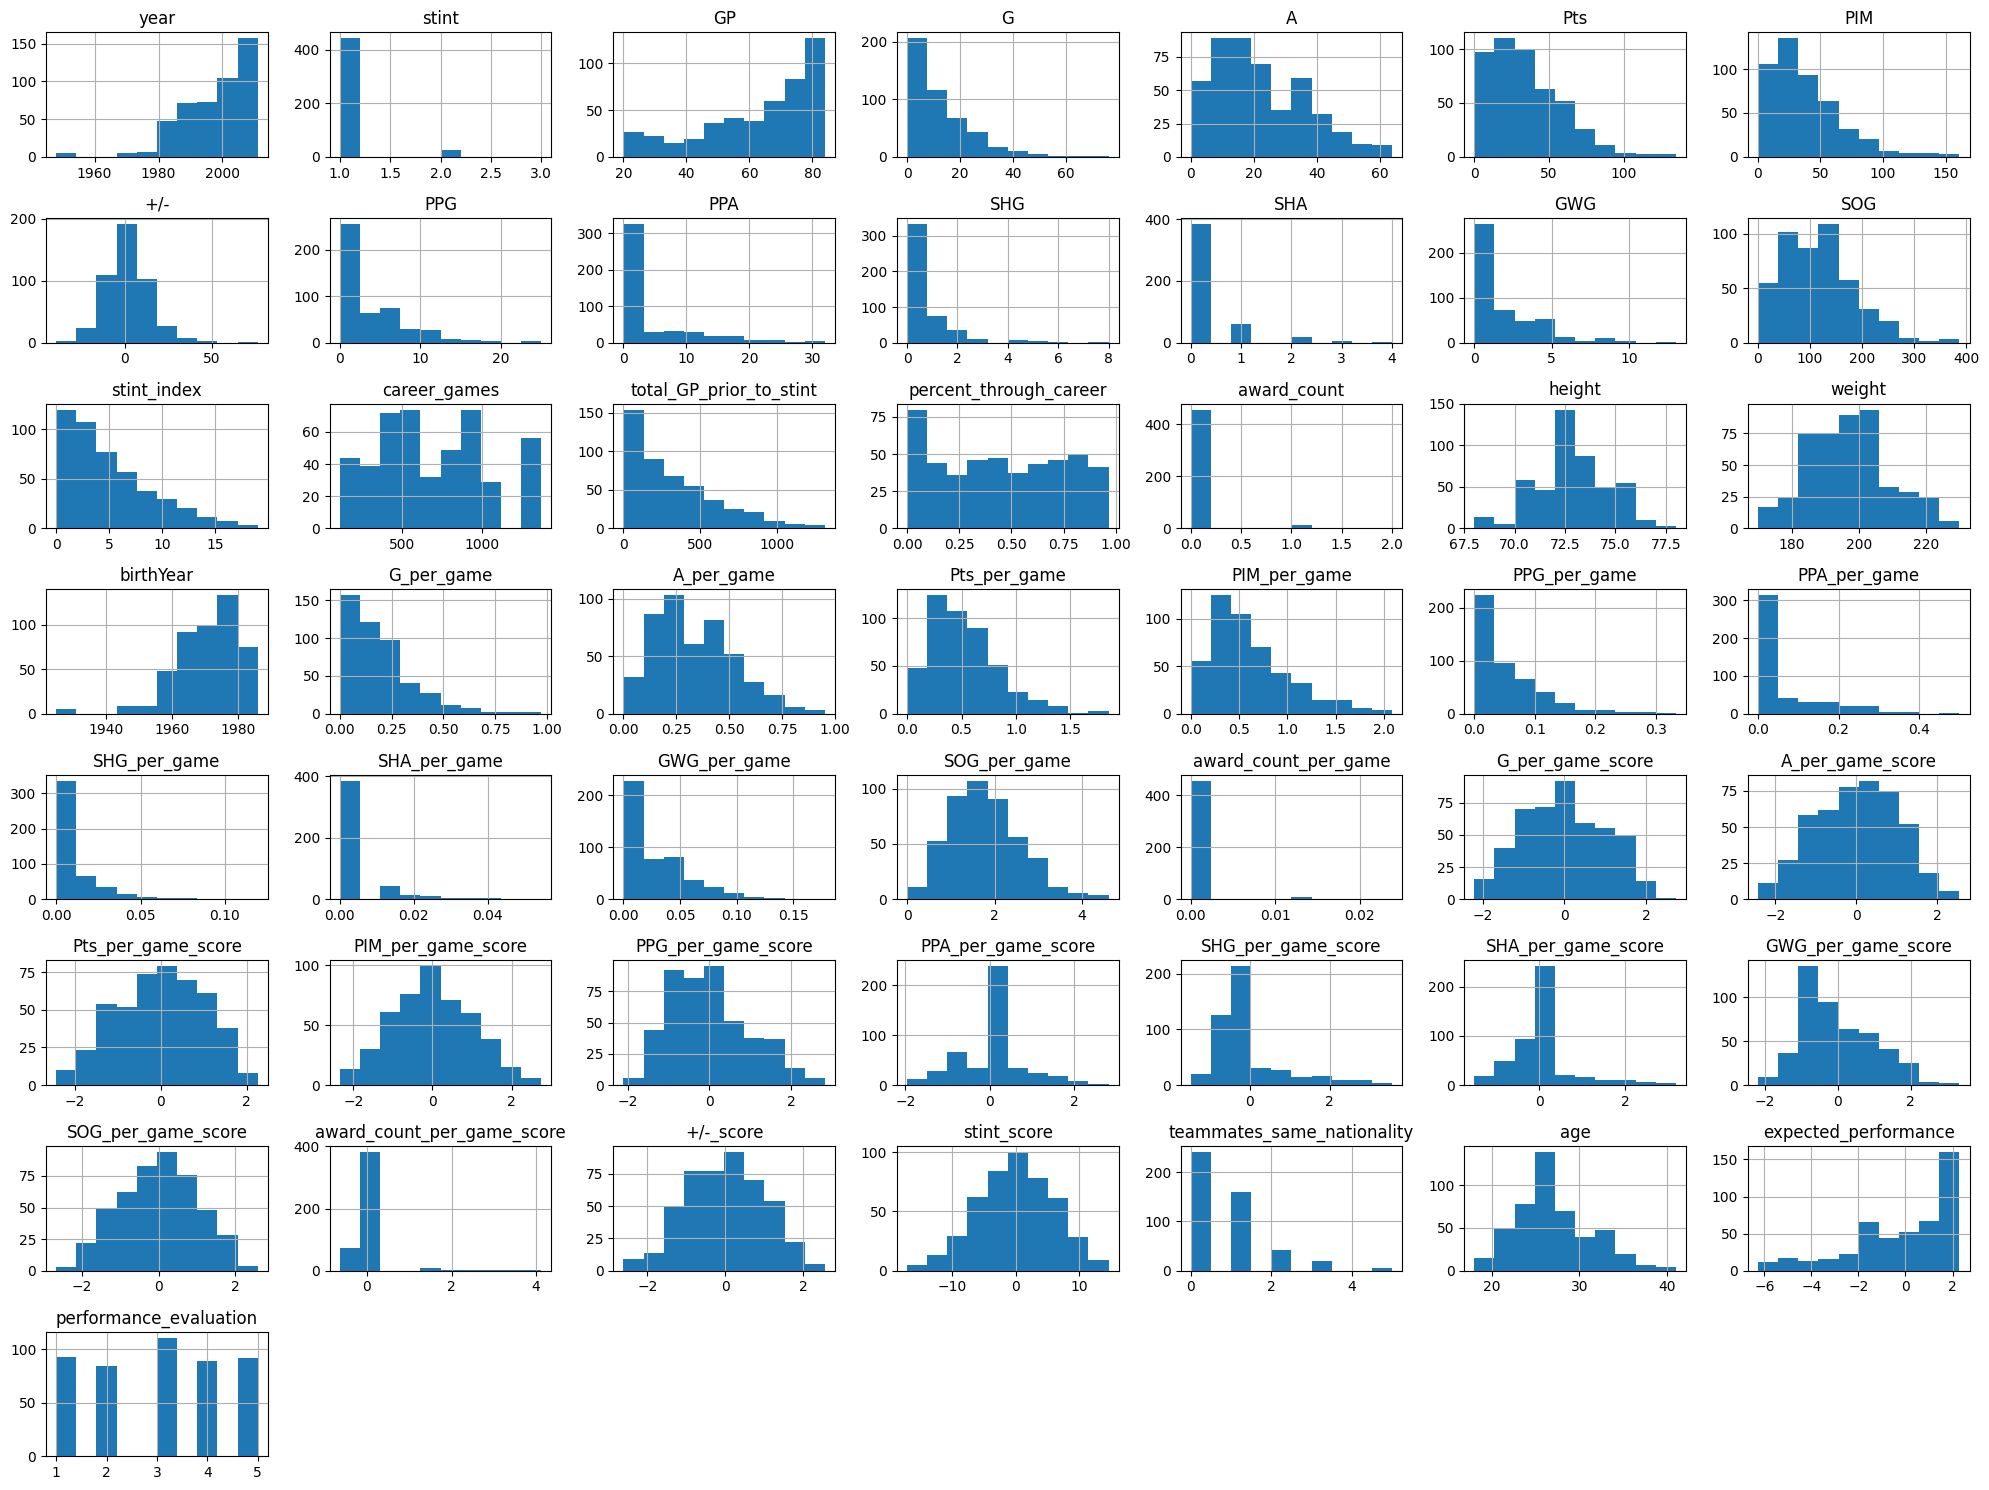

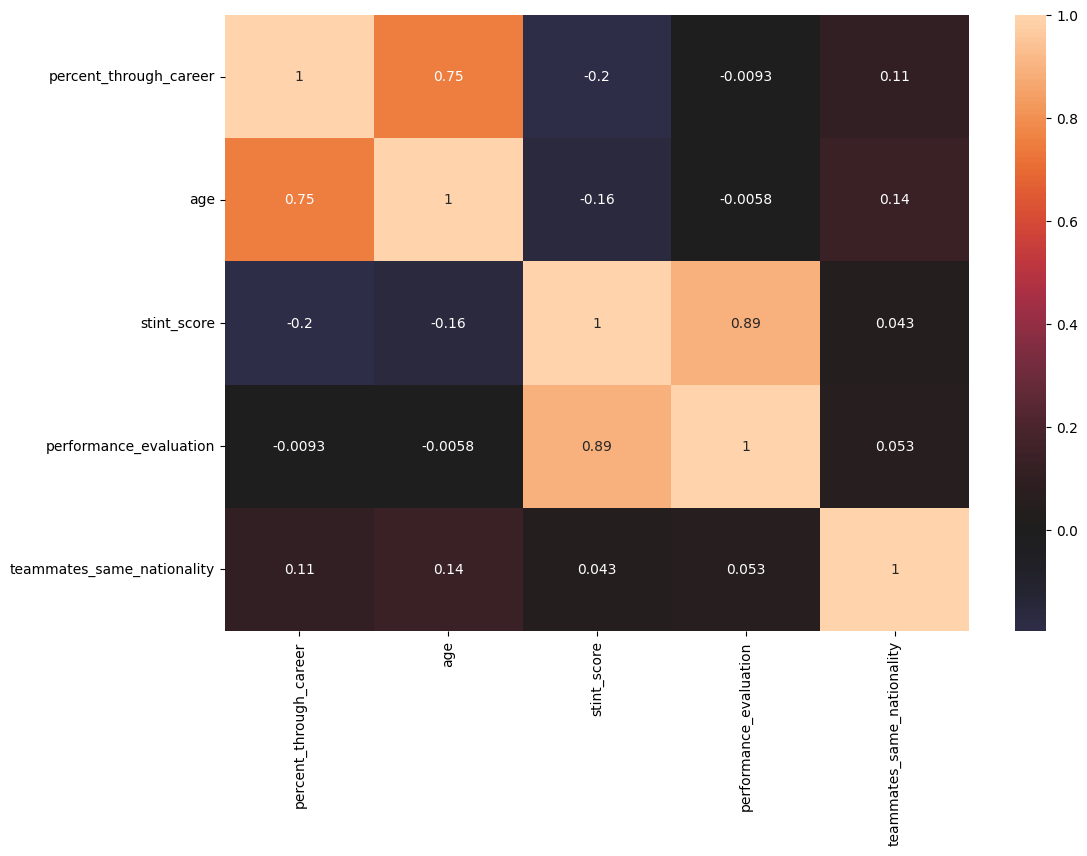

In [27]:
country = 'Finland'

show_distribution_for_country(country)
show_correlation_for_country(country)

### Slovakia

<Figure size 1200x800 with 0 Axes>

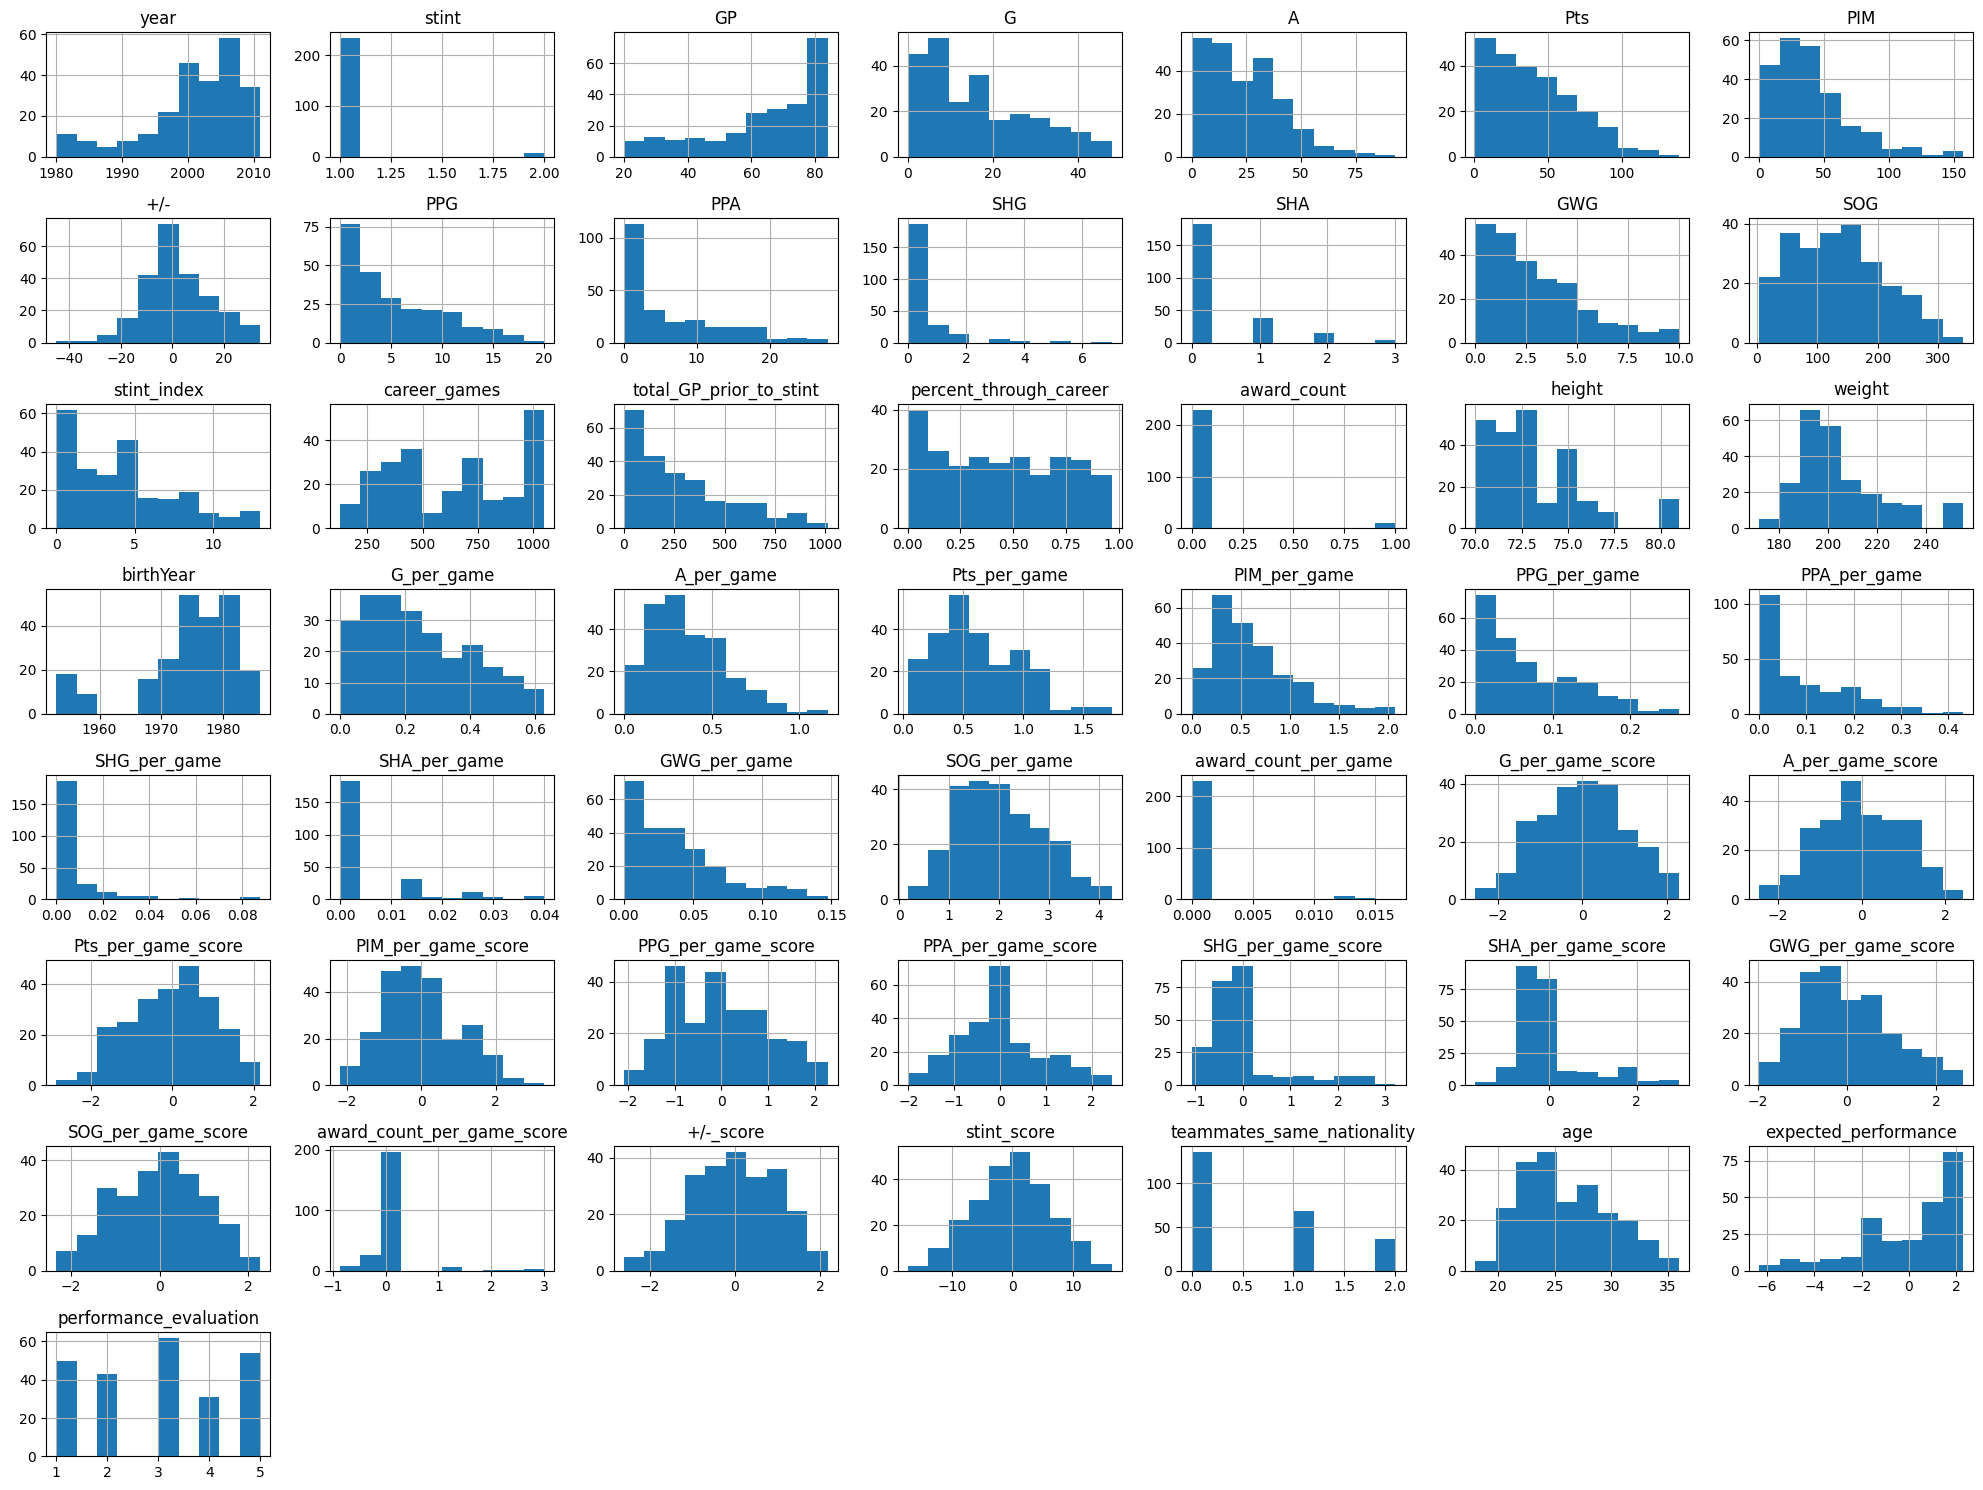

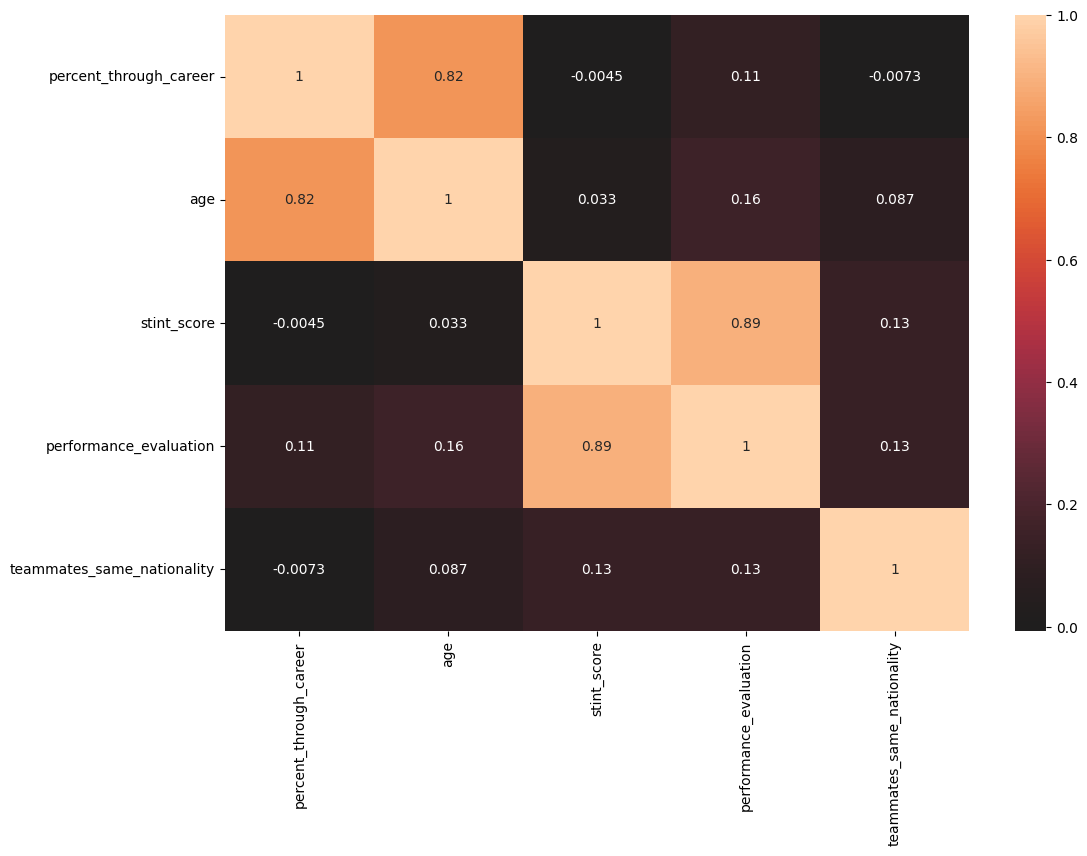

In [28]:
country = 'Slovakia'

show_distribution_for_country(country)
show_correlation_for_country(country)

In [29]:
earliest_year = df['year'].min()
latest_year = df['year'].max()

print(earliest_year, latest_year)

1917 2011
